### Dont run all cells, hyperparameter tuning 1, will take 453min(~8hrs)

# Telecom Churn

In [1]:
#Importing Libraries

import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

import datetime as dt

import statsmodels.api as sm
import sklearn

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Used to view all the columns, rows of the dataset
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",130)
# Used to adjust the columns width
pd.set_option('max_colwidth', None)

### 1.) Data Understanding & Data Preparation

In [3]:
telecom_churn = pd.read_csv("telecom_churn_data.csv")
print(telecom_churn.shape)
telecom_churn.head()

(99999, 226)


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
# loading the data dictionary
data_dict = pd.read_excel("Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")
data_dict

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belongs to
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mobile to mobile)"
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


In [5]:
telecom_churn.info(max_cols=300)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             99999 non-null  int64  
 1   circle_id                 99999 non-null  int64  
 2   loc_og_t2o_mou            98981 non-null  float64
 3   std_og_t2o_mou            98981 non-null  float64
 4   loc_ic_t2o_mou            98981 non-null  float64
 5   last_date_of_month_6      99999 non-null  object 
 6   last_date_of_month_7      99398 non-null  object 
 7   last_date_of_month_8      98899 non-null  object 
 8   last_date_of_month_9      98340 non-null  object 
 9   arpu_6                    99999 non-null  float64
 10  arpu_7                    99999 non-null  float64
 11  arpu_8                    99999 non-null  float64
 12  arpu_9                    99999 non-null  float64
 13  onnet_mou_6               96062 non-null  float64
 14  onnet

In [6]:
telecom_churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [7]:
# calculating the missing value percentage
round((telecom_churn.isnull().sum()/telecom_churn.shape[0])*100,0)

mobile_number     0.0
circle_id         0.0
loc_og_t2o_mou    1.0
std_og_t2o_mou    1.0
loc_ic_t2o_mou    1.0
                 ... 
aon               0.0
aug_vbc_3g        0.0
jul_vbc_3g        0.0
jun_vbc_3g        0.0
sep_vbc_3g        0.0
Length: 226, dtype: float64

In [8]:
# Attributes with missing value percentage more than 70%
telecom_churn.isnull().sum()[round((telecom_churn.isnull().sum()/telecom_churn.shape[0])*100,0) >=70]

date_of_last_rech_data_6    74846
date_of_last_rech_data_7    74428
date_of_last_rech_data_8    73660
date_of_last_rech_data_9    74077
total_rech_data_6           74846
total_rech_data_7           74428
total_rech_data_8           73660
total_rech_data_9           74077
max_rech_data_6             74846
max_rech_data_7             74428
max_rech_data_8             73660
max_rech_data_9             74077
count_rech_2g_6             74846
count_rech_2g_7             74428
count_rech_2g_8             73660
count_rech_2g_9             74077
count_rech_3g_6             74846
count_rech_3g_7             74428
count_rech_3g_8             73660
count_rech_3g_9             74077
av_rech_amt_data_6          74846
av_rech_amt_data_7          74428
av_rech_amt_data_8          73660
av_rech_amt_data_9          74077
arpu_3g_6                   74846
arpu_3g_7                   74428
arpu_3g_8                   73660
arpu_3g_9                   74077
arpu_2g_6                   74846
arpu_2g_7     

#### a.) Creating Target Variable and Calculating High Value Customers

##### Calculating High Value Customers

- Here before creating the target variable, we see that the data we have consists of both high-value customers and non high-value customers.
- Here we want to predict churn only on high-value customers as approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.
- We can filter the data to have only high-value customers by following the below steps and then can proceed to create the target variable and then EDA with existing data.
- Filter high-value customers(HVC) using 6th and 7th months(‘good’ phase)
    1. Calculate total data recharge amount.
    2. calculate total recharge amount.
           a. call recharge amount( total_rech_amt ) + data recharge amount.
    3. Calculate average recharge done by customer in June and July.
- After performing the above steps we can retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount.   

In [9]:
# Filter high-value customers(HVC) from existing data.
telecom_churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [10]:
# Calculate total data recharge amount.
# Here we can see there are few NaN values which indicate that no recharge has been done in that particular month.
# we can impute these values with 0 (means no recharge done)
telecom_churn[["total_rech_data_6","total_rech_data_7","av_rech_amt_data_6","av_rech_amt_data_7"]].head()

,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7
0,1.0,1.0,252.0,252.0
1,NaN,1.0,NaN,154.0
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,1.0,NaN,56.0,NaN


In [11]:
telecom_churn[["total_rech_data_6","total_rech_data_7","av_rech_amt_data_6","av_rech_amt_data_7"]] = telecom_churn[["total_rech_data_6","total_rech_data_7","av_rech_amt_data_6","av_rech_amt_data_7"]].fillna(0)
telecom_churn[["total_rech_data_6","total_rech_data_7","av_rech_amt_data_6","av_rech_amt_data_7"]].head()

,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7
0,1.0,1.0,252.0,252.0
1,0.0,1.0,0.0,154.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,1.0,0.0,56.0,0.0


In [12]:
telecom_churn["total_rech_data_amt_6"] = telecom_churn["total_rech_data_6"] * telecom_churn["av_rech_amt_data_6"]
telecom_churn["total_rech_data_amt_7"] = telecom_churn["total_rech_data_7"] * telecom_churn["av_rech_amt_data_7"]

In [13]:
telecom_churn[["total_rech_data_6","total_rech_data_7","av_rech_amt_data_6","av_rech_amt_data_7","total_rech_data_amt_6","total_rech_data_amt_7"]].head()

,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,total_rech_data_amt_6,total_rech_data_amt_7
0,1.0,1.0,252.0,252.0,252.0,252.0
1,0.0,1.0,0.0,154.0,0.0,154.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,56.0,0.0,56.0,0.0


In [14]:
# creating column "Avg recharge"(total_rech_amt + total_rech_data_amt) for months 6 & 7
telecom_churn["avg_rech_amt_6_7"] = (telecom_churn[["total_rech_amt_6","total_rech_amt_7","total_rech_data_amt_6","total_rech_data_amt_7"]].sum(axis=1))/2
telecom_churn[["total_rech_amt_6","total_rech_amt_7","total_rech_data_amt_6","total_rech_data_amt_7","avg_rech_amt_6_7"]].head()

,total_rech_amt_6,total_rech_amt_7,total_rech_data_amt_6,total_rech_data_amt_7,avg_rech_amt_6_7
0,362,252,252.0,252.0,559.0
1,74,384,0.0,154.0,306.0
2,168,315,0.0,0.0,241.5
3,230,310,0.0,0.0,270.0
4,196,350,56.0,0.0,301.0


In [15]:
# Looking at the distribution of the "avg_rech_amt_6_7" attribute
# Here we can see there are outlier but the main task is to obtain high-value customers(HVC ) and we can deal with outlier in EDA
# we can remove all the data points which has "avg_rech_amt_6_7"< value of 70th percentile
telecom_churn["avg_rech_amt_6_7"].describe(percentiles=[0.25,0.5,0.7,0.8,0.9,0.95])

count    99999.000000
mean       485.328068
std        869.423594
min          0.000000
25%        128.000000
50%        275.000000
70%        478.000000
80%        656.500000
90%       1028.000000
95%       1512.000000
max      61236.000000
Name: avg_rech_amt_6_7, dtype: float64

In [16]:
telecom_churn["avg_rech_amt_6_7"].quantile(0.70)

478.0

In [17]:
telecom_churn_HVC = telecom_churn[telecom_churn["avg_rech_amt_6_7"]>=telecom_churn["avg_rech_amt_6_7"].quantile(0.70)]
telecom_churn_HVC = telecom_churn_HVC.drop("avg_rech_amt_6_7",1)
print(telecom_churn_HVC.shape)
telecom_churn_HVC.head()

(30001, 228)


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN

In [18]:
telecom_churn_HVC.info(max_cols=300)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 228 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             30001 non-null  int64  
 1   circle_id                 30001 non-null  int64  
 2   loc_og_t2o_mou            29777 non-null  float64
 3   std_og_t2o_mou            29777 non-null  float64
 4   loc_ic_t2o_mou            29777 non-null  float64
 5   last_date_of_month_6      30001 non-null  object 
 6   last_date_of_month_7      29974 non-null  object 
 7   last_date_of_month_8      29836 non-null  object 
 8   last_date_of_month_9      29636 non-null  object 
 9   arpu_6                    30001 non-null  float64
 10  arpu_7                    30001 non-null  float64
 11  arpu_8                    30001 non-null  float64
 12  arpu_9                    30001 non-null  float64
 13  onnet_mou_6               29456 non-null  float64
 14  onnet

In [19]:
# calculating the missing value percentage
round((telecom_churn_HVC.isnull().sum()/telecom_churn_HVC.shape[0])*100,0).sort_values(ascending = False)

max_rech_data_9       49.0
fb_user_9             49.0
night_pck_user_9      49.0
arpu_2g_9             49.0
arpu_3g_9             49.0
                      ... 
last_day_rch_amt_8     0.0
last_day_rch_amt_9     0.0
total_rech_data_6      0.0
total_rech_data_7      0.0
mobile_number          0.0
Length: 228, dtype: float64

In [20]:
# Attributes with missing value percentage more than 40%
telecom_churn_HVC.isnull().sum()[round((telecom_churn_HVC.isnull().sum()/telecom_churn_HVC.shape[0])*100,0) >=40] 

date_of_last_rech_data_6    13245
date_of_last_rech_data_7    12944
date_of_last_rech_data_8    14048
date_of_last_rech_data_9    14781
total_rech_data_8           14048
total_rech_data_9           14781
max_rech_data_6             13245
max_rech_data_7             12944
max_rech_data_8             14048
max_rech_data_9             14781
count_rech_2g_6             13245
count_rech_2g_7             12944
count_rech_2g_8             14048
count_rech_2g_9             14781
count_rech_3g_6             13245
count_rech_3g_7             12944
count_rech_3g_8             14048
count_rech_3g_9             14781
av_rech_amt_data_8          14048
av_rech_amt_data_9          14781
arpu_3g_6                   13245
arpu_3g_7                   12944
arpu_3g_8                   14048
arpu_3g_9                   14781
arpu_2g_6                   13245
arpu_2g_7                   12944
arpu_2g_8                   14048
arpu_2g_9                   14781
night_pck_user_6            13245
night_pck_user

##### Creating target variable
- For creating the target variable using 9th month data as it is the ‘churn’ phase.
- In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In [21]:
# Creating target variable "churn"
telecom_churn_HVC.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN

In [22]:
telecom_churn_HVC[["total_ic_mou_9","total_og_mou_9","vol_2g_mb_9","vol_3g_mb_9"]].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00
8,34.91,142.18,0.00,0.00
21,252.61,1031.53,0.00,0.00
23,127.48,127.63,13.93,314.74


In [23]:
# Calculating the user with all the 4 ("total_ic_mou_9","total_og_mou_9","vol_2g_mb_9","vol_3g_mb_9") attributes as zero
round(telecom_churn_HVC[["total_ic_mou_9","total_og_mou_9","vol_2g_mb_9","vol_3g_mb_9"]].sum(axis=1),2)

0           0.00
7           0.00
8         177.09
21       1284.14
23        583.78
          ...   
99981     455.84
99984    1119.67
99986    2592.97
99988     841.39
99997    4265.02
Length: 30001, dtype: float64

In [24]:
telecom_churn_HVC["churn"] = (round(telecom_churn_HVC[["total_ic_mou_9","total_og_mou_9","vol_2g_mb_9","vol_3g_mb_9"]].sum(axis=1),2) == 0.00).astype(int)
print(telecom_churn_HVC.shape)
telecom_churn_HVC.head()

(30001, 229)


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,N

Percentage of churn data
 0    91.86
1     8.14
Name: churn, dtype: float64


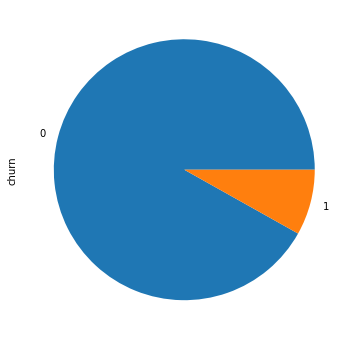

In [25]:
# calculaing the percentage of churn data.
# Here we can see that the data we have is an imbalanced data(i.e., rate of churn is very less compared to people who have not churned)
print("Percentage of churn data\n",round(telecom_churn_HVC.churn.value_counts(1)*100,2))
plt.figure(figsize=(6,6))
telecom_churn_HVC.churn.value_counts().plot(kind="pie")
plt.show()

In [26]:
# As we have defined churn based on this phase(9th month).Thus, after tagging churn as 1/0 based on this phase, 
# we need to discard all data corresponding to this phase
month_9_attributes = [x for x in telecom_churn_HVC.columns if x.split("_")[-1] == "9"]
telecom_churn_hvc_months_6to8 = telecom_churn_HVC[telecom_churn_HVC.columns[~(telecom_churn_HVC.columns.isin(month_9_attributes))]]
telecom_churn_hvc_months_6to8 = telecom_churn_hvc_months_6to8.drop("sep_vbc_3g",1)
print(telecom_churn_hvc_months_6to8.shape)
telecom_churn_hvc_months_6to8.head()

(30001, 174)


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,252.0,252.0,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74

### 2.) Data Cleaning

In [27]:
print(telecom_churn_hvc_months_6to8.shape)
telecom_churn_hvc_months_6to8.head()

(30001, 174)


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,252.0,252.0,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74

In [28]:
# calculating the missing value percentage
def missing_percentage(df):
    Missing_Percentage_data = pd.DataFrame({"Missing_Percentage":round((df.isnull().sum()/df.shape[0])*100,2)})
    Missing_Percentage_data = Missing_Percentage_data.reset_index()
    Missing_Percentage_data = Missing_Percentage_data.rename(columns={"index": "Attributes"})
    Missing_Percentage_data = Missing_Percentage_data[Missing_Percentage_data.Missing_Percentage !=0.00]
    Missing_Percentage_data = Missing_Percentage_data.sort_values("Missing_Percentage",ascending=False)
    return Missing_Percentage_data
missing_percentage(telecom_churn_hvc_months_6to8)

,Attributes,Missing_Percentage
166,fb_user_8,46.83
148,arpu_2g_8,46.83
127,max_rech_data_8,46.83
133,count_rech_3g_8,46.83
136,av_rech_amt_data_8,46.83
124,total_rech_data_8,46.83
121,date_of_last_rech_data_8,46.83
130,count_rech_2g_8,46.83
145,arpu_3g_8,46.83
151,night_pck_user_8,46.83


- #### Deriving "no of the days from last recharge" from "date variables"

In [29]:
# Here we see that there are null values in "last_date_of_month" which can be imputed with the same date in the respective column
# After imputing the required columns, we can covert all date columns to datetime type
# In "date_of_last_rech" we can assume that having null values means there is no recharge done in that particular month,
# this is may be because he has already done a recharge in last month that may be still valid.

date_columns = [x for x in telecom_churn_hvc_months_6to8.columns if "date" in x.split("_")]
print(telecom_churn_hvc_months_6to8[date_columns].info(),"\n","="*120)
print(telecom_churn_hvc_months_6to8[date_columns].isnull().sum(),"\n","="*120)
telecom_churn_hvc_months_6to8[date_columns].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   last_date_of_month_6      30001 non-null  object
 1   last_date_of_month_7      29974 non-null  object
 2   last_date_of_month_8      29836 non-null  object
 3   date_of_last_rech_6       29928 non-null  object
 4   date_of_last_rech_7       29903 non-null  object
 5   date_of_last_rech_8       29418 non-null  object
 6   date_of_last_rech_data_6  16756 non-null  object
 7   date_of_last_rech_data_7  17057 non-null  object
 8   date_of_last_rech_data_8  15953 non-null  object
dtypes: object(9)
memory usage: 2.3+ MB
None 
last_date_of_month_6            0
last_date_of_month_7           27
last_date_of_month_8          165
date_of_last_rech_6            73
date_of_last_rech_7            98
date_of_last_rech_8           583
date_of_last_rech_data_6    13245
date_of_last_r

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/21/2014,7/16/2014,8/8/2014,6/21/2014,7/16/2014,8/8/2014
7,6/30/2014,7/31/2014,8/31/2014,6/27/2014,7/25/2014,8/26/2014,NaN,NaN,NaN
8,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/31/2014,8/30/2014,NaN,7/31/2014,8/23/2014
21,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/31/2014,8/31/2014,NaN,NaN,NaN
23,6/30/2014,7/31/2014,8/31/2014,6/18/2014,7/7/2014,8/24/2014,NaN,7/7/2014,8/6/2014


In [30]:
# Imputed the values for "last_date_of_month" columns
for i in ["last_date_of_month_6","last_date_of_month_7","last_date_of_month_8"]:
    telecom_churn_hvc_months_6to8[i].fillna(telecom_churn_hvc_months_6to8[i].unique()[0],inplace=True)
print(telecom_churn_hvc_months_6to8[date_columns].isnull().sum(),"\n","="*120)
telecom_churn_hvc_months_6to8[date_columns].head()

last_date_of_month_6            0
last_date_of_month_7            0
last_date_of_month_8            0
date_of_last_rech_6            73
date_of_last_rech_7            98
date_of_last_rech_8           583
date_of_last_rech_data_6    13245
date_of_last_rech_data_7    12944
date_of_last_rech_data_8    14048
dtype: int64 


,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/21/2014,7/16/2014,8/8/2014,6/21/2014,7/16/2014,8/8/2014
7,6/30/2014,7/31/2014,8/31/2014,6/27/2014,7/25/2014,8/26/2014,NaN,NaN,NaN
8,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/31/2014,8/30/2014,NaN,7/31/2014,8/23/2014
21,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/31/2014,8/31/2014,NaN,NaN,NaN
23,6/30/2014,7/31/2014,8/31/2014,6/18/2014,7/7/2014,8/24/2014,NaN,7/7/2014,8/6/2014


In [31]:
for i in telecom_churn_hvc_months_6to8[date_columns].columns:
    telecom_churn_hvc_months_6to8[i] = pd.to_datetime(telecom_churn_hvc_months_6to8[i],format="%m/%d/%Y")
print(telecom_churn_hvc_months_6to8[date_columns].info(),"\n","="*120)
telecom_churn_hvc_months_6to8[date_columns].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   last_date_of_month_6      30001 non-null  datetime64[ns]
 1   last_date_of_month_7      30001 non-null  datetime64[ns]
 2   last_date_of_month_8      30001 non-null  datetime64[ns]
 3   date_of_last_rech_6       29928 non-null  datetime64[ns]
 4   date_of_last_rech_7       29903 non-null  datetime64[ns]
 5   date_of_last_rech_8       29418 non-null  datetime64[ns]
 6   date_of_last_rech_data_6  16756 non-null  datetime64[ns]
 7   date_of_last_rech_data_7  17057 non-null  datetime64[ns]
 8   date_of_last_rech_data_8  15953 non-null  datetime64[ns]
dtypes: datetime64[ns](9)
memory usage: 2.3 MB
None 


,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,2014-06-30,2014-07-31,2014-08-31,2014-06-21,2014-07-16,2014-08-08,2014-06-21,2014-07-16,2014-08-08
7,2014-06-30,2014-07-31,2014-08-31,2014-06-27,2014-07-25,2014-08-26,NaT,NaT,NaT
8,2014-06-30,2014-07-31,2014-08-31,2014-06-25,2014-07-31,2014-08-30,NaT,2014-07-31,2014-08-23
21,2014-06-30,2014-07-31,2014-08-31,2014-06-30,2014-07-31,2014-08-31,NaT,NaT,NaT
23,2014-06-30,2014-07-31,2014-08-31,2014-06-18,2014-07-07,2014-08-24,NaT,2014-07-07,2014-08-06


- #### Calculating the no of the days from last recharge.
    - 1.) Here while calculating we see that there are few null values in each row of "date_of_last_rech" which we can assume as no recharge done in that particular month.
    - 2.) If we have a null value in 8th month then we check if there is any rechager done in the previous month for these null values in 8th month and we can continue this till 6th month.
    - 3.) If we donot find any date till starting of 6th month we can consider the last date of recharge as 92days i.e., no recharge done since last three months so for this we can impute the null values with " 31st May 2014"

In [32]:
# imputing null values in 6th month with " 31st May 2014"
telecom_churn_hvc_months_6to8.date_of_last_rech_6 = telecom_churn_hvc_months_6to8.date_of_last_rech_6.fillna(dt.datetime.strptime("2014-05-31","%Y-%m-%d"))
telecom_churn_hvc_months_6to8.date_of_last_rech_data_6 = telecom_churn_hvc_months_6to8.date_of_last_rech_data_6.fillna(dt.datetime.strptime("2014-05-31","%Y-%m-%d"))

In [33]:
# Calculating the no of the days from last recharge
telecom_churn_hvc_months_6to8["no_of_days_from_last_rech"] = (telecom_churn_hvc_months_6to8.last_date_of_month_8 - telecom_churn_hvc_months_6to8.date_of_last_rech_8)

telecom_churn_hvc_months_6to8["no_of_days_from_last_rech_1"] = (telecom_churn_hvc_months_6to8[telecom_churn_hvc_months_6to8.date_of_last_rech_8.isnull()].last_date_of_month_8 - telecom_churn_hvc_months_6to8[telecom_churn_hvc_months_6to8.date_of_last_rech_8.isnull()].date_of_last_rech_7)

telecom_churn_hvc_months_6to8["no_of_days_from_last_rech_2"] = (telecom_churn_hvc_months_6to8[(telecom_churn_hvc_months_6to8.date_of_last_rech_8.isnull()) & (telecom_churn_hvc_months_6to8.date_of_last_rech_7.isnull())].last_date_of_month_8 - telecom_churn_hvc_months_6to8[(telecom_churn_hvc_months_6to8.date_of_last_rech_8.isnull()) & (telecom_churn_hvc_months_6to8.date_of_last_rech_7.isnull())].date_of_last_rech_6)

# Calculating the no of the days from last data recharge
telecom_churn_hvc_months_6to8["no_of_days_from_last_rech_data"] = (telecom_churn_hvc_months_6to8.last_date_of_month_8 - telecom_churn_hvc_months_6to8.date_of_last_rech_data_8)

telecom_churn_hvc_months_6to8["no_of_days_from_last_rech_data_1"] = (telecom_churn_hvc_months_6to8[telecom_churn_hvc_months_6to8.date_of_last_rech_data_8.isnull()].last_date_of_month_8 - telecom_churn_hvc_months_6to8[telecom_churn_hvc_months_6to8.date_of_last_rech_data_8.isnull()].date_of_last_rech_data_7)

telecom_churn_hvc_months_6to8["no_of_days_from_last_rech_data_2"] = (telecom_churn_hvc_months_6to8[(telecom_churn_hvc_months_6to8.date_of_last_rech_data_8.isnull()) & (telecom_churn_hvc_months_6to8.date_of_last_rech_data_7.isnull())].last_date_of_month_8 - telecom_churn_hvc_months_6to8[(telecom_churn_hvc_months_6to8.date_of_last_rech_data_8.isnull()) & (telecom_churn_hvc_months_6to8.date_of_last_rech_data_7.isnull())].date_of_last_rech_data_6)


In [34]:
for i in ["no_of_days_from_last_rech","no_of_days_from_last_rech_1","no_of_days_from_last_rech_2","no_of_days_from_last_rech_data","no_of_days_from_last_rech_data_1","no_of_days_from_last_rech_data_2"]:
    telecom_churn_hvc_months_6to8[i] = telecom_churn_hvc_months_6to8[i].apply(lambda x : None if str(x) == "NaT" else float(str(x).split()[0]))
    telecom_churn_hvc_months_6to8[i] = telecom_churn_hvc_months_6to8[i].fillna(0)
    
telecom_churn_hvc_months_6to8["no_of_days_from_last_rech"] = (telecom_churn_hvc_months_6to8.no_of_days_from_last_rech + telecom_churn_hvc_months_6to8.no_of_days_from_last_rech_1 + telecom_churn_hvc_months_6to8.no_of_days_from_last_rech_2)
telecom_churn_hvc_months_6to8["no_of_days_from_last_rech_data"] = (telecom_churn_hvc_months_6to8.no_of_days_from_last_rech_data + telecom_churn_hvc_months_6to8.no_of_days_from_last_rech_data_1 + telecom_churn_hvc_months_6to8.no_of_days_from_last_rech_data_2)
telecom_churn_hvc_months_6to8 = telecom_churn_hvc_months_6to8.drop(["no_of_days_from_last_rech_1","no_of_days_from_last_rech_2","no_of_days_from_last_rech_data_1","no_of_days_from_last_rech_data_2"],axis=1)

In [35]:
date_columns.extend(["no_of_days_from_last_rech","no_of_days_from_last_rech_data"])
telecom_churn_hvc_months_6to8[date_columns].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,no_of_days_from_last_rech,no_of_days_from_last_rech_data
0,2014-06-30,2014-07-31,2014-08-31,2014-06-21,2014-07-16,2014-08-08,2014-06-21,2014-07-16,2014-08-08,23.0,23.0
7,2014-06-30,2014-07-31,2014-08-31,2014-06-27,2014-07-25,2014-08-26,2014-05-31,NaT,NaT,5.0,92.0
8,2014-06-30,2014-07-31,2014-08-31,2014-06-25,2014-07-31,2014-08-30,2014-05-31,2014-07-31,2014-08-23,1.0,8.0
21,2014-06-30,2014-07-31,2014-08-31,2014-06-30,2014-07-31,2014-08-31,2014-05-31,NaT,NaT,0.0,92.0
23,2014-06-30,2014-07-31,2014-08-31,2014-06-18,2014-07-07,2014-08-24,2014-05-31,2014-07-07,2014-08-06,7.0,25.0


In [36]:
# Here after calculating the no of days from last recharge we can see that we will have "0" when "date_of_last_rech_8" is equal to "last_date_of_month_8"
# The rows having "0" where date_of_last_rech_8" != "last_date_of_month_8" we can impute those values with 92days
telecom_churn_hvc_months_6to8[date_columns][["no_of_days_from_last_rech","no_of_days_from_last_rech_data"]]

,no_of_days_from_last_rech,no_of_days_from_last_rech_data
0,23.0,23.0
7,5.0,92.0
8,1.0,8.0
21,0.0,92.0
23,7.0,25.0
...,...,...
99981,4.0,8.0
99984,4.0,4.0
99986,13.0,17.0
99988,2.0,8.0


- #### Sanity check for the days for both rech and data

- #### "no_of_days_from_last_rech"

In [37]:
# Checking the rows having "0" where date_of_last_rech_8" == "last_date_of_month_8"
# Here we have 6200 rows with no_of_days_from_last_rech = 0
telecom_churn_hvc_months_6to8[["date_of_last_rech_6","date_of_last_rech_7","last_date_of_month_8","date_of_last_rech_8","no_of_days_from_last_rech"]][(telecom_churn_hvc_months_6to8.last_date_of_month_8 == telecom_churn_hvc_months_6to8.date_of_last_rech_8)]

,date_of_last_rech_6,date_of_last_rech_7,last_date_of_month_8,date_of_last_rech_8,no_of_days_from_last_rech
21,2014-06-30,2014-07-31,2014-08-31,2014-08-31,0.0
41,2014-06-24,2014-07-22,2014-08-31,2014-08-31,0.0
56,2014-06-28,2014-07-30,2014-08-31,2014-08-31,0.0
69,2014-06-30,2014-07-28,2014-08-31,2014-08-31,0.0
73,2014-06-30,2014-07-31,2014-08-31,2014-08-31,0.0
...,...,...,...,...,...
99927,2014-06-27,2014-07-24,2014-08-31,2014-08-31,0.0
99937,2014-06-29,2014-07-29,2014-08-31,2014-08-31,0.0
99957,2014-06-30,2014-07-29,2014-08-31,2014-08-31,0.0
99963,2014-06-30,2014-07-31,2014-08-31,2014-08-31,0.0


In [38]:
# Checking the rows having "0" where date_of_last_rech_8" != "last_date_of_month_8"
# Here we have 0 rows with no_of_days_from_last_rech =0 
telecom_churn_hvc_months_6to8[["date_of_last_rech_6","date_of_last_rech_7","last_date_of_month_8","date_of_last_rech_8","no_of_days_from_last_rech"]][(telecom_churn_hvc_months_6to8.last_date_of_month_8 != telecom_churn_hvc_months_6to8.date_of_last_rech_8)][telecom_churn_hvc_months_6to8.no_of_days_from_last_rech==92]

,date_of_last_rech_6,date_of_last_rech_7,last_date_of_month_8,date_of_last_rech_8,no_of_days_from_last_rech


- #### "no_of_days_from_last_rech_data"

In [39]:
# Checking the rows having "0" where date_of_last_rech_8" == "date_of_last_rech_data_8"
# Here we have 1304 rows with no_of_days_from_last_rech = 0
telecom_churn_hvc_months_6to8[["last_date_of_month_8","date_of_last_rech_data_6","date_of_last_rech_data_7","date_of_last_rech_data_8","no_of_days_from_last_rech_data"]][(telecom_churn_hvc_months_6to8.last_date_of_month_8 == telecom_churn_hvc_months_6to8.date_of_last_rech_data_8)]

,last_date_of_month_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,no_of_days_from_last_rech_data
56,2014-08-31,2014-06-17,2014-07-27,2014-08-31,0.0
213,2014-08-31,2014-06-04,NaT,2014-08-31,0.0
274,2014-08-31,2014-06-13,2014-07-09,2014-08-31,0.0
284,2014-08-31,2014-06-06,2014-07-05,2014-08-31,0.0
357,2014-08-31,2014-06-27,2014-07-30,2014-08-31,0.0
...,...,...,...,...,...
99741,2014-08-31,2014-06-30,2014-07-11,2014-08-31,0.0
99786,2014-08-31,2014-06-24,2014-07-26,2014-08-31,0.0
99823,2014-08-31,2014-05-31,2014-07-20,2014-08-31,0.0
99853,2014-08-31,2014-06-30,2014-07-30,2014-08-31,0.0


In [40]:
# Checking the rows having "0" where date_of_last_rech_8" != "last_date_of_month_8"
# Here we have 9222 rows with no_of_days_from_last_rech_data = 92 which means we can assume that these are the customers 
# who have not recharged the data since last three months
telecom_churn_hvc_months_6to8[["last_date_of_month_8","date_of_last_rech_data_6","date_of_last_rech_data_7","date_of_last_rech_data_8","no_of_days_from_last_rech_data"]][(telecom_churn_hvc_months_6to8.last_date_of_month_8 != telecom_churn_hvc_months_6to8.date_of_last_rech_data_8)][telecom_churn_hvc_months_6to8.no_of_days_from_last_rech_data==0]

,last_date_of_month_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,no_of_days_from_last_rech_data


In [41]:
telecom_churn_hvc_months_6to8[["last_date_of_month_8","date_of_last_rech_data_6","date_of_last_rech_data_7","date_of_last_rech_data_8","no_of_days_from_last_rech_data"]][(telecom_churn_hvc_months_6to8.last_date_of_month_8 != telecom_churn_hvc_months_6to8.date_of_last_rech_data_8)][telecom_churn_hvc_months_6to8.no_of_days_from_last_rech_data==92]

,last_date_of_month_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,no_of_days_from_last_rech_data
7,2014-08-31,2014-05-31,NaT,NaT,92.0
21,2014-08-31,2014-05-31,NaT,NaT,92.0
38,2014-08-31,2014-05-31,NaT,NaT,92.0
41,2014-08-31,2014-05-31,NaT,NaT,92.0
48,2014-08-31,2014-05-31,NaT,NaT,92.0
...,...,...,...,...,...
99924,2014-08-31,2014-05-31,NaT,NaT,92.0
99937,2014-08-31,2014-05-31,NaT,NaT,92.0
99939,2014-08-31,2014-05-31,NaT,NaT,92.0
99941,2014-08-31,2014-05-31,NaT,NaT,92.0


In [42]:
telecom_churn_hvc_months_6to8 = telecom_churn_hvc_months_6to8.drop(['last_date_of_month_6','last_date_of_month_7',
                                                                   'last_date_of_month_8','date_of_last_rech_6',
                                                                   'date_of_last_rech_7','date_of_last_rech_8',
                                                                   'date_of_last_rech_data_6','date_of_last_rech_data_7',
                                                                   'date_of_last_rech_data_8'],axis=1)
telecom_churn_hvc_months_6to8.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,churn,no_of_days_from_last_rech,no_of_days_from_last_rech_data
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,252.0,252.0,1,23.0,23.0
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,

- #### treating other missing values with high missing value percentage
    - Here we can see that most of the variables are related to data services and are null values which indicate that the user has most used or using internet sevices.
    - Hence we can consider that there is no recharge do for that particular month and can be imputed with "0" for all the data related variables

In [43]:
missing_percentage(telecom_churn_hvc_months_6to8)

,Attributes,Missing_Percentage
157,fb_user_8,46.83
115,total_rech_data_8,46.83
142,night_pck_user_8,46.83
118,max_rech_data_8,46.83
121,count_rech_2g_8,46.83
139,arpu_2g_8,46.83
124,count_rech_3g_8,46.83
136,arpu_3g_8,46.83
127,av_rech_amt_data_8,46.83
134,arpu_3g_6,44.15


In [44]:
telecom_churn_hvc_months_6to8.isnull().sum()[round((telecom_churn_hvc_months_6to8.isnull().sum()/telecom_churn_hvc_months_6to8.shape[0])*100,0) >=40]

total_rech_data_8     14048
max_rech_data_6       13245
max_rech_data_7       12944
max_rech_data_8       14048
count_rech_2g_6       13245
count_rech_2g_7       12944
count_rech_2g_8       14048
count_rech_3g_6       13245
count_rech_3g_7       12944
count_rech_3g_8       14048
av_rech_amt_data_8    14048
arpu_3g_6             13245
arpu_3g_7             12944
arpu_3g_8             14048
arpu_2g_6             13245
arpu_2g_7             12944
arpu_2g_8             14048
night_pck_user_6      13245
night_pck_user_7      12944
night_pck_user_8      14048
fb_user_6             13245
fb_user_7             12944
fb_user_8             14048
dtype: int64

In [45]:
data_rech_col = ["total_rech_data_8","max_rech_data_6","max_rech_data_7","max_rech_data_8", "count_rech_2g_6",
                 "count_rech_2g_7","count_rech_2g_8","count_rech_3g_6","count_rech_3g_7","count_rech_3g_8",
                 "av_rech_amt_data_8","arpu_3g_6","arpu_3g_7","arpu_3g_8","arpu_2g_6","arpu_2g_7","arpu_2g_8"]

data_rech_col_cat = ["night_pck_user_6","night_pck_user_7","night_pck_user_8","fb_user_6","fb_user_7","fb_user_8"]

# Imputing all the data recharge related variables with "0" and categorical variables with -1
telecom_churn_hvc_months_6to8[data_rech_col] =telecom_churn_hvc_months_6to8[data_rech_col].fillna(0)
telecom_churn_hvc_months_6to8[data_rech_col_cat] =telecom_churn_hvc_months_6to8[data_rech_col_cat].fillna(-1)

telecom_churn_hvc_months_6to8[["total_rech_data_8","max_rech_data_6","max_rech_data_7","max_rech_data_8", "count_rech_2g_6",
                 "count_rech_2g_7","count_rech_2g_8","count_rech_3g_6","count_rech_3g_7","count_rech_3g_8",
                 "av_rech_amt_data_8","arpu_3g_6","arpu_3g_7","arpu_3g_8","arpu_2g_6","arpu_2g_7",
                 "arpu_2g_8","night_pck_user_6","night_pck_user_7","night_pck_user_8","fb_user_6","fb_user_7","fb_user_8"]].head()

,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8
0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,1.0,1.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
8,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,69.0,0.00,0.00,19.83,0.00,0.00,0.00,-1.0,0.0,0.0,-1.0,1.0,1.0
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
23,2.0,0.0,179.0,179.0,0.0,0.0,0.0,0.0,2.0,2.0,270.0,0.00,306.57,197.27,0.00,301.78,150.67,-1.0,0.0,0.0,-1.0,1.0,1.0


In [46]:
# checking the missing value percentage
# Here we can see that most of the missing values are from MOU and percentage of missing values is very small
# We can drop these rows if there is no significant drop in the chrun percentage
missing_percentage(telecom_churn_hvc_months_6to8)

,Attributes,Missing_Percentage
100,ic_others_8,3.91
67,loc_ic_t2m_mou_8,3.91
49,std_og_mou_8,3.91
28,loc_og_t2f_mou_8,3.91
73,loc_ic_mou_8,3.91
31,loc_og_t2c_mou_8,3.91
70,loc_ic_t2f_mou_8,3.91
34,loc_og_mou_8,3.91
37,std_og_t2t_mou_8,3.91
79,std_ic_t2m_mou_8,3.91


In [47]:
mou_variables = [x for x in missing_percentage(telecom_churn_hvc_months_6to8)["Attributes"].tolist() if "mou" in x.split("_")]
telecom_churn_hvc_months_6to8[mou_variables].head()

,loc_ic_t2m_mou_8,std_og_mou_8,loc_og_t2f_mou_8,loc_ic_mou_8,loc_og_t2c_mou_8,loc_ic_t2f_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_ic_t2m_mou_8,loc_ic_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,spl_og_mou_8,std_og_t2c_mou_8,loc_og_t2m_mou_8,std_ic_t2t_mou_8,loc_og_t2t_mou_8,std_ic_t2o_mou_8,isd_ic_mou_8,onnet_mou_8,spl_ic_mou_8,offnet_mou_8,roam_ic_mou_8,std_ic_mou_8,isd_og_mou_8,roam_og_mou_8,std_ic_t2f_mou_8,std_ic_t2t_mou_6,spl_og_mou_6,std_ic_t2f_mou_6,isd_ic_mou_6,loc_ic_mou_6,std_ic_t2o_mou_6,spl_ic_mou_6,loc_ic_t2m_mou_6,std_ic_t2m_mou_6,std_ic_mou_6,loc_ic_t2f_mou_6,loc_ic_t2t_mou_6,isd_og_mou_6,roam_ic_mou_6,roam_og_mou_6,std_og_t2t_mou_6,loc_og_t2m_mou_6,std_og_t2m_mou_6,loc_og_t2c_mou_6,std_og_t2f_mou_6,offnet_mou_6,loc_og_t2t_mou_6,std_og_t2c_mou_6,onnet_mou_6,std_og_mou_6,loc_og_t2f_mou_6,loc_og_mou_6,std_ic_t2f_mou_7,roam_og_mou_7,std_ic_t2o_mou_7,std_og_mou_7,roam_ic_mou_7,std_ic_mou_7,offnet_mou_7,spl_ic_mou_7,onnet_mou_7,isd_ic_mou_7,loc_og_t2t_mou_7,std_ic_t2t_mou_7,std_ic_t2m_mou_7,loc_og_t2m_mou_7,isd_og_mou_7,std_og_t2c_mou_7,spl_og_mou_7,std_og_t2f_mou_7,std_og_t2m_mou_7,loc_ic_t2t_mou_7,std_og_t2t_mou_7,loc_ic_t2m_mou_7,loc_og_mou_7,loc_ic_t2f_mou_7,loc_og_t2c_mou_7,loc_ic_mou_7,loc_og_t2f_mou_7,loc_ic_t2o_mou,std_og_t2o_mou,loc_og_t2o_mou
0,4.13,0.00,0.00,5.44,0.00,1.15,0.00,0.00,0.00,0.16,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
7,121.19,77.84,53.23,188.04,0.00,39.53,255.79,12.01,141.33,27.31,49.14,16.68,6.50,0.0,162.28,30.39,40.28,0.0,31.59,52.29,0.0,325.91,31.64,193.94,10.01,38.06,22.21,36.89,4.5,52.19,2.06,427.88,0.0,0.21,217.56,91.44,180.54,152.16,58.14,0.0,16.23,23.74,4.30,308.63,49.89,0.0,6.66,453.43,51.39,0.0,57.84,60.86,62.13,422.16,34.24,12.59,0.0,75.14,33.49,173.08,567.16,0.0,54.68,14.53,31.38,11.83,126.99,447.38,0.18,0.0,0.0,20.08,31.76,32.26,23.29,221.49,533.91,101.46,0.0,355.23,55.14,0.0,0.0,0.0
8,15.48,98.28,0.00,15.79,7.15,0.00,63.04,22.58,0.65,0.31,75.69,0.00,10.23,0.0,50.54,0.10,12.49,0.0,0.00,35.08,0.0,136.48,0.00,0.75,0.00,0.00,0.00,0.00,0.0,0.00,0.00,81.43,0.0,0.00,57.58,22.43,22.43,0.00,23.84,0.0,0.00,0.00,116.56,80.96,13.69,0.0,0.00,94.66,297.13,0.0,413.69,130.26,0.00,378.09,0.00,0.00,0.0,143.48,0.00,4.66,80.63,0.0,351.03,0.00,217.59,0.58,4.08,70.58,0.00,0.0,0.0,0.00,10.04,9.84,133.43,13.98,288.18,0.00,0.0,23.83,0.00,0.0,0.0,0.0
21,129.16,938.79,1.58,159.11,0.00,10.39,129.74,61.79,101.74,19.54,876.99,0.00,0.00,0.0,104.81,0.18,23.34,0.0,0.00,85.14,0.0,983.39,0.00,101.93,0.00,0.00,0.00,14.06,0.0,0.00,0.00,125.33,0.0,0.00,118.23,67.69,81.76,4.61,2.48,0.0,0.00,0.00,97.93,91.81,665.36,0.0,0.00,757.93,4.48,0.0,102.41,763.29,0.75,97.04,0.00,0.00,0.0,934.69,0.00,44.21,896.68,0.0,132.11,0.00,6.16,5.98,38.23,87.93,0.00,0.0,0.0,0.00,808.74,10.19,125.94,74.63,94.09,2.84,0.0,87.68,0.00,0.0,0.0,0.0
23,146.84,39.61,0.00,224.21,17.71,0.71,182.14,0.00,43.91,76.64,39.61,0.00,17.71,0.0,148.56,13.38,33.58,0.0,3.74,33.58,0.0,205.89,0.00,57.29,0.00,0.00,0.00,0.51,0.1,0.00,0.00,116.63,0.0,0.00,95.91,2.43,2.94,0.00,20.71,0.0,0.00,0.00,0.00,82.94,2.36,0.0,0.00,85.41,48.96,0.0,48.96,2.36,0.00,131.91,0.00,0.00,0.0,6.35,0.00,14.89,89.36,0.0,50.66,28.23,50.66,0.00,14.89,83.01,0.01,0.0,0.0,0.00,6.35,61.04,0.00,113.36,133.68,0.00,0.0,174.41,0.00,0.0,0.0,0.0


In [48]:
# Droping the rows with null values as the change in churn percentage is less than 3% i.e., approximately 2.54%
telecom_churn_hvc_cleaned = telecom_churn_hvc_months_6to8.dropna()
telecom_churn_hvc_cleaned.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,churn,no_of_days_from_last_rech,no_of_days_from_last_rech_data
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,0.0,0.0,1,5.0,92.0
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0,0.00,356.00,0.03,0.0,750.

Percentage of churn data
 0    94.4
1     5.6
Name: churn, dtype: float64


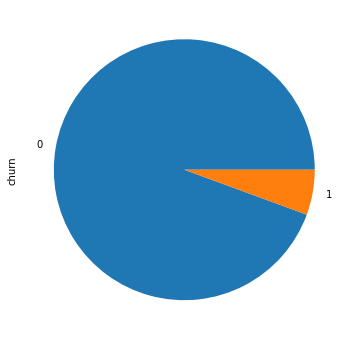

In [49]:
print("Percentage of churn data\n",round(telecom_churn_hvc_cleaned.churn.value_counts(1)*100,2))
plt.figure(figsize=(6,6))
telecom_churn_hvc_cleaned.churn.value_counts().plot(kind="pie")
plt.show()

In [50]:
# checking the missing value percentage
# here we can see that all the missing value are treated and there no missing values in the data
missing_percentage(telecom_churn_hvc_cleaned)

,Attributes,Missing_Percentage


- #### Instead of evaluating all the three months we can combine these varaibles into one variable and evaluate based on the derived variables
    - derived variable = varaible of month 8 - ((varaible of month 6 + varaible of month 7)/2)
    - Here our derived variable is measure of the usability of the feature i.e., if the value of the derived variable is a positive value that means user is consistently using the services where as if the value is a negative value then we can assume that user is not happy with serivices and the usage has been reduced

In [51]:
print(telecom_churn_hvc_cleaned.shape)
telecom_churn_hvc_cleaned.head()

(28504, 167)


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,churn,no_of_days_from_last_rech,no_of_days_from_last_rech_data
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,0.0,0.0,1,5.0,92.0
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0,0.00,356.00,0.03,0.0,750.

In [52]:
# creating a list with the variables of each month
var_6 = [x for x in telecom_churn_hvc_cleaned.columns if x.split("_")[-1] == "6"]
var_6.remove("total_rech_data_amt_6")
var_7 = [x for x in telecom_churn_hvc_cleaned.columns if x.split("_")[-1] == "7"]
var_7.remove("total_rech_data_amt_7")
var_8 = [x for x in telecom_churn_hvc_cleaned.columns if x.split("_")[-1] == "8"]

In [53]:
# checking whether variables are same in all the three months
# In these ["night_pck_user_6","night_pck_user_7","night_pck_user_8","fb_user_6","fb_user_7","fb_user_8"] are the categorical variables
# and can be left as it is.
var_6_7_8 = pd.DataFrame({"var_6":var_6,"var_7":var_7,"var_8":var_8})
#var_6_7_8 = var_6_7_8.drop([["night_pck_user_6","night_pck_user_7","night_pck_user_8"]])
var_6_7_8.head()

,var_6,var_7,var_8
0,arpu_6,arpu_7,arpu_8
1,onnet_mou_6,onnet_mou_7,onnet_mou_8
2,offnet_mou_6,offnet_mou_7,offnet_mou_8
3,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8
4,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8


In [54]:
# deriving the variables using all the available three months
telecom_churn_hvc_derived_var = telecom_churn_hvc_cleaned.copy()

telecom_churn_hvc_derived_var["total_rech_data_amt_8"] = telecom_churn_hvc_derived_var["total_rech_data_8"] * telecom_churn_hvc_derived_var["av_rech_amt_data_8"]

for i,v in enumerate(var_6):
    if v not in ["night_pck_user_6","night_pck_user_7","night_pck_user_8","fb_user_6","fb_user_7","fb_user_8"]:
        new_var = v[:-1] + "diff"
        telecom_churn_hvc_derived_var[new_var]=  (telecom_churn_hvc_derived_var[var_8[i]])-(((telecom_churn_hvc_derived_var[var_6[i]]) + (telecom_churn_hvc_derived_var[var_7[i]])))/2

telecom_churn_hvc_derived_var = telecom_churn_hvc_derived_var.drop(var_6,1)
telecom_churn_hvc_derived_var = telecom_churn_hvc_derived_var.drop(var_7,1)
telecom_churn_hvc_derived_var = telecom_churn_hvc_derived_var.drop(var_8,1)
telecom_churn_hvc_derived_var[["night_pck_user_6","night_pck_user_7","night_pck_user_8","fb_user_6","fb_user_7","fb_user_8"]] = telecom_churn_hvc_cleaned[["night_pck_user_6","night_pck_user_7","night_pck_user_8","fb_user_6","fb_user_7","fb_user_8"]]

print(telecom_churn_hvc_derived_var.shape)
telecom_churn_hvc_derived_var.head()

(28504, 70)


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,churn,no_of_days_from_last_rech,no_of_days_from_last_rech_data,total_rech_data_amt_8,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,loc_og_t2c_mou_diff,loc_og_mou_diff,std_og_t2t_mou_diff,std_og_t2m_mou_diff,std_og_t2f_mou_diff,std_og_t2c_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,og_others_diff,total_og_mou_diff,loc_ic_t2t_mou_diff,loc_ic_t2m_mou_diff,loc_ic_t2f_mou_diff,loc_ic_mou_diff,std_ic_t2t_mou_diff,std_ic_t2m_mou_diff,std_ic_t2f_mou_diff,std_ic_t2o_mou_diff,std_ic_mou_diff,total_ic_mou_diff,spl_ic_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,last_day_rch_amt_diff,total_rech_data_diff,max_rech_data_diff,count_rech_2g_diff,count_rech_3g_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,arpu_3g_diff,arpu_2g_diff,monthly_2g_diff,sachet_2g_diff,monthly_3g_diff,sachet_3g_diff,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8
7,7000701601,109,0.0,0.0,0.0,802,57.74,19.38,18.74,0.0,0.0,1,5.0,92.0,0.0,1961.9650,-3.97,-184.385,6.78,19.895,-1.105,-215.725,-5.405,0.00,-222.245,-1.785,8.315,3.31,0.0,9.840,9.920,4.25,0.0,-198.225,-17.890,-98.335,-87.280,-203.515,6.030,32.115,-21.005,0.0,17.130,-163.510,-0.105,23.295,-0.325,2.0,2453.0,395.0,779.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
8,7001524846,109,0.0,0.0,0.0,315,21.03,910.65,122.16,0.0,354.0,0,1.0,8.0,207.0,-298.1100,-347.28,48.835,0.00,0.000,-244.870,-25.230,0.000,7.15,-270.095,-102.415,63.825,0.00,0.0,-38.590,0.000,10.23,0.0,-298.450,-16.530,-20.300,0.000,-36.840,-0.190,-12.605,0.000,0.0,-12.795,-49.635,0.000,0.000,0.000,-6.0,-399.0,-92.0,-15.0,2.0,-54.0,2.0,0.0,-19.5,-177.970,-363.535,19.830,0.00,-0.5,2.5,0.0,0.0,-1.0,0.0,0.0,-1.0,1.0,1.0
21,7002124215,109,0.0,0.0,0.0,720,0.00,0.00,0.00,0.0,0.0,0,0.0,92.0,0.0,81.6570,-32.12,156.085,0.00,0.000,18.020,14.940,1.205,0.00,34.175,-50.145,139.940,0.00,0.0,89.800,0.000,0.00,0.0,123.975,13.205,32.730,6.665,52.605,-9.840,48.780,0.000,0.0,38.945,91.550,0.000,0.000,0.000,3.0,78.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
23,7000887461,109,0.0,0.0,0.0,604,40.45,51.86,0.00,0.0,712.0,0,7.0,25.0,540.0,232.8425,-16.23,118.505,0.00,0.000,-16.230,65.585,0.000,17.71,49.345,0.000,35.255,0.00,0.0,35.255,-0.005,17.66,0.0,102.270,35.765,42.205,0.710,78.690,13.125,35.250,0.000,0.0,48.375,127.095,0.000,-10.375,10.385,0.0,212.0,89.5,-89.5,1.0,89.5,0.0,1.0,92.0,-0.230,710.375,43.985,-0.22,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,-1.0,1.0,1.0
33,7000149764,109,0.0,0.0,0.0,1328,358.10,2706.83,1714.67,5285.0,20424.0,0,5.0,5.0,455.0,-1260.6965,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.56,0.000,0.000,0.000,0.00,0.0,0.000,0.000,0.56,0.0,0.560,1.295,37.930,-0.860,38.360,-1.405,-1.505,-0.465,0.0,-3.380,34.250,0.000,0.000,-0.740,-9.5,-1477.0,-298.5,329.0,-5.5,-298.5,0.0,-5.5,-1350.0,-64.435,1868.735,-1190.555,-1173.97,0.0,0.0,-3.5,-2.0,1.0,1.0,0.0,1.0,1.0,1.0


In [55]:
telecom_churn_hvc_derived_var["vbc_3g_diff"] = telecom_churn_hvc_derived_var["aug_vbc_3g"]-(telecom_churn_hvc_derived_var["jun_vbc_3g"]+telecom_churn_hvc_derived_var["jul_vbc_3g"])/2
telecom_churn_hvc_derived_var["total_rech_data_amt_diff"] = telecom_churn_hvc_derived_var["total_rech_data_amt_8"]-(telecom_churn_hvc_derived_var["total_rech_data_amt_6"]+telecom_churn_hvc_derived_var["total_rech_data_amt_7"])/2
telecom_churn_hvc_derived_var = telecom_churn_hvc_derived_var.drop(["jun_vbc_3g","jul_vbc_3g","aug_vbc_3g","total_rech_data_amt_6","total_rech_data_amt_7","total_rech_data_amt_8"],1)
print(telecom_churn_hvc_derived_var.shape)
telecom_churn_hvc_derived_var.head()

(28504, 66)


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,aon,churn,no_of_days_from_last_rech,no_of_days_from_last_rech_data,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,loc_og_t2c_mou_diff,loc_og_mou_diff,std_og_t2t_mou_diff,std_og_t2m_mou_diff,std_og_t2f_mou_diff,std_og_t2c_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,og_others_diff,total_og_mou_diff,loc_ic_t2t_mou_diff,loc_ic_t2m_mou_diff,loc_ic_t2f_mou_diff,loc_ic_mou_diff,std_ic_t2t_mou_diff,std_ic_t2m_mou_diff,std_ic_t2f_mou_diff,std_ic_t2o_mou_diff,std_ic_mou_diff,total_ic_mou_diff,spl_ic_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,last_day_rch_amt_diff,total_rech_data_diff,max_rech_data_diff,count_rech_2g_diff,count_rech_3g_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,arpu_3g_diff,arpu_2g_diff,monthly_2g_diff,sachet_2g_diff,monthly_3g_diff,sachet_3g_diff,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,vbc_3g_diff,total_rech_data_amt_diff
7,7000701601,109,0.0,0.0,0.0,802,1,5.0,92.0,1961.9650,-3.97,-184.385,6.78,19.895,-1.105,-215.725,-5.405,0.00,-222.245,-1.785,8.315,3.31,0.0,9.840,9.920,4.25,0.0,-198.225,-17.890,-98.335,-87.280,-203.515,6.030,32.115,-21.005,0.0,17.130,-163.510,-0.105,23.295,-0.325,2.0,2453.0,395.0,779.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,38.680,0.0
8,7001524846,109,0.0,0.0,0.0,315,0,1.0,8.0,-298.1100,-347.28,48.835,0.00,0.000,-244.870,-25.230,0.000,7.15,-270.095,-102.415,63.825,0.00,0.0,-38.590,0.000,10.23,0.0,-298.450,-16.530,-20.300,0.000,-36.840,-0.190,-12.605,0.000,0.0,-12.795,-49.635,0.000,0.000,0.000,-6.0,-399.0,-92.0,-15.0,2.0,-54.0,2.0,0.0,-19.5,-177.970,-363.535,19.830,0.00,-0.5,2.5,0.0,0.0,-1.0,0.0,0.0,-1.0,1.0,1.0,-495.375,30.0
21,7002124215,109,0.0,0.0,0.0,720,0,0.0,92.0,81.6570,-32.12,156.085,0.00,0.000,18.020,14.940,1.205,0.00,34.175,-50.145,139.940,0.00,0.0,89.800,0.000,0.00,0.0,123.975,13.205,32.730,6.665,52.605,-9.840,48.780,0.000,0.0,38.945,91.550,0.000,0.000,0.000,3.0,78.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.000,0.0
23,7000887461,109,0.0,0.0,0.0,604,0,7.0,25.0,232.8425,-16.23,118.505,0.00,0.000,-16.230,65.585,0.000,17.71,49.345,0.000,35.255,0.00,0.0,35.255,-0.005,17.66,0.0,102.270,35.765,42.205,0.710,78.690,13.125,35.250,0.000,0.0,48.375,127.095,0.000,-10.375,10.385,0.0,212.0,89.5,-89.5,1.0,89.5,0.0,1.0,92.0,-0.230,710.375,43.985,-0.22,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,-1.0,1.0,1.0,14.520,184.0
33,7000149764,109,0.0,0.0,0.0,1328,0,5.0,5.0,-1260.6965,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.56,0.000,0.000,0.000,0.00,0.0,0.000,0.000,0.56,0.0,0.560,1.295,37.930,-0.860,38.360,-1.405,-1.505,-0.465,0.0,-3.380,34.250,0.000,0.000,-0.740,-9.5,-1477.0,-298.5,329.0,-5.5,-298.5,0.0,-5.5,-1350.0,-64.435,1868.735,-1190.555,-1173.97,0.0,0.0,-3.5,-2.0,1.0,1.0,0.0,1.0,1.0,1.0,-1852.650,-12399.5


- #### Removing all the unnecessary variables

In [56]:
telecom_churn_hvc_derived_var.describe(percentiles=[0.25,0.5,0.75,0.85,0.9,0.95,0.99])

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,aon,churn,no_of_days_from_last_rech,no_of_days_from_last_rech_data,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,loc_og_t2c_mou_diff,loc_og_mou_diff,std_og_t2t_mou_diff,std_og_t2m_mou_diff,std_og_t2f_mou_diff,std_og_t2c_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,og_others_diff,total_og_mou_diff,loc_ic_t2t_mou_diff,loc_ic_t2m_mou_diff,loc_ic_t2f_mou_diff,loc_ic_mou_diff,std_ic_t2t_mou_diff,std_ic_t2m_mou_diff,std_ic_t2f_mou_diff,std_ic_t2o_mou_diff,std_ic_mou_diff,total_ic_mou_diff,spl_ic_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,last_day_rch_amt_diff,total_rech_data_diff,max_rech_data_diff,count_rech_2g_diff,count_rech_3g_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,arpu_3g_diff,arpu_2g_diff,monthly_2g_diff,sachet_2g_diff,monthly_3g_diff,sachet_3g_diff,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,vbc_3g_diff,total_rech_data_amt_diff
count,2.850400e+04,28504.0,28504.0,28504.0,28504.0,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.0,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.0,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.00000,28504.000000,28504.000000,28504.000000
mean,7.001214e+09,109.0,0.0,0.0,0.0,1234.055817,0.055992,4.492141,42.004666,-39.443054,-25.863830,-34.643455,-1.562157,-2.925703,-6.144446,-9.255334,-0.447832,0.011939,-15.847919,-18.383128,-22.855038,-0.206089,0.0,-41.444573,-0.064989,0.254139,-0.297051,-57.401197,-2.415260,-2.364911,-1.101686,-5.882034,-0.956029,-1.590625,-0.149254,0.0,-2.696083,-8.735337,-0.013813,-0.058990,-0.084036,-1.636595,-63.011490,-6.194604,-5.891998,-0.097478,-4.625035,-0.081708,-0.015770,-9.929308,-18.266349,2.937967,-2.865377,-3.603331,-0.023926,-0.057781,-0.005701,-0.010069,-0.431764,-0.417591,-0.446534,0.067008,0.09304,0.026102,3.886596,-16.670693
std,6.877760e+05,0.0,0.0,0.0,0.0,964.182647,0.229911,6.236794,37.493024,319.074710,305.100916,342.942300,65.989111,95.134751,139.580853,147.250506,14.264813,7.015377,213.141957,269.429130,299.214100,7.584191,0.0,420.109638,11.892829,18.255874,3.398534,493.441653,101.675496,133.109145,29.852238,176.538217,58.992909,75.460291,13.869593,0.0,99.010040,217.750146,0.178132,57.354409,9.676845,6.604281,404.148444,131.369626,142.738960,2.188222,74.115528,1.854742,0.990892,143.471230,256.823889,601.254419,126.955786,111.839847,0.356410,1.844704,0.467587,0.873385,0.522022,0.518622,0.520179,0.976337,0.97229,0.970544,311.693439,1428.525531
min,7.000000e+09,109.0,0.0,0.0,0.0,180.000000,0.000000,0.000000,0.000000,-4598.711500,-5295.315000,-7094.390000,-1296.985000,-2410.835000,-3875.375000,-2863.535000,-1319.850000,-384.385000,-3867.830000,-5391.210000,-7037.535000,-314.280000,0.0,-7127.425000,-362.360000,-1081.910000,-304.905000,-7213.410000,-3021.870000,-2384.855000,-928.210000,-2523.885000,-2897.680000,-2624.905000,-636.500000,0.0,-2777.350000,-5710.150000,-16.280000,-5534.595000,-408.240000,-147.500000,-6507.000000,-3010.000000,-3065.000000,-25.500000,-806.000000,-25.500000,-21.500000,-3486.500000,-4740.925000,-10466.160000,-2944.290000,-2980.040000,-3.000000,-26.000000,-7.500000,-21.500000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-4808.360000,-52407.500000
25%,7.000623e+09,109.

In [57]:
# removing variable with single unique values and mobile_number
telecom_churn_hvc_derived_var = telecom_churn_hvc_derived_var.drop(["mobile_number","circle_id","loc_og_t2o_mou","std_og_t2o_mou","loc_ic_t2o_mou","std_og_t2c_mou_diff","std_ic_t2o_mou_diff",],axis=1)
print(telecom_churn_hvc_derived_var.shape)
telecom_churn_hvc_derived_var.head()

(28504, 59)


,aon,churn,no_of_days_from_last_rech,no_of_days_from_last_rech_data,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,loc_og_t2c_mou_diff,loc_og_mou_diff,std_og_t2t_mou_diff,std_og_t2m_mou_diff,std_og_t2f_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,og_others_diff,total_og_mou_diff,loc_ic_t2t_mou_diff,loc_ic_t2m_mou_diff,loc_ic_t2f_mou_diff,loc_ic_mou_diff,std_ic_t2t_mou_diff,std_ic_t2m_mou_diff,std_ic_t2f_mou_diff,std_ic_mou_diff,total_ic_mou_diff,spl_ic_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,last_day_rch_amt_diff,total_rech_data_diff,max_rech_data_diff,count_rech_2g_diff,count_rech_3g_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,arpu_3g_diff,arpu_2g_diff,monthly_2g_diff,sachet_2g_diff,monthly_3g_diff,sachet_3g_diff,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,vbc_3g_diff,total_rech_data_amt_diff
7,802,1,5.0,92.0,1961.9650,-3.97,-184.385,6.78,19.895,-1.105,-215.725,-5.405,0.00,-222.245,-1.785,8.315,3.31,9.840,9.920,4.25,0.0,-198.225,-17.890,-98.335,-87.280,-203.515,6.030,32.115,-21.005,17.130,-163.510,-0.105,23.295,-0.325,2.0,2453.0,395.0,779.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,38.680,0.0
8,315,0,1.0,8.0,-298.1100,-347.28,48.835,0.00,0.000,-244.870,-25.230,0.000,7.15,-270.095,-102.415,63.825,0.00,-38.590,0.000,10.23,0.0,-298.450,-16.530,-20.300,0.000,-36.840,-0.190,-12.605,0.000,-12.795,-49.635,0.000,0.000,0.000,-6.0,-399.0,-92.0,-15.0,2.0,-54.0,2.0,0.0,-19.5,-177.970,-363.535,19.830,0.00,-0.5,2.5,0.0,0.0,-1.0,0.0,0.0,-1.0,1.0,1.0,-495.375,30.0
21,720,0,0.0,92.0,81.6570,-32.12,156.085,0.00,0.000,18.020,14.940,1.205,0.00,34.175,-50.145,139.940,0.00,89.800,0.000,0.00,0.0,123.975,13.205,32.730,6.665,52.605,-9.840,48.780,0.000,38.945,91.550,0.000,0.000,0.000,3.0,78.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.000,0.0
23,604,0,7.0,25.0,232.8425,-16.23,118.505,0.00,0.000,-16.230,65.585,0.000,17.71,49.345,0.000,35.255,0.00,35.255,-0.005,17.66,0.0,102.270,35.765,42.205,0.710,78.690,13.125,35.250,0.000,48.375,127.095,0.000,-10.375,10.385,0.0,212.0,89.5,-89.5,1.0,89.5,0.0,1.0,92.0,-0.230,710.375,43.985,-0.22,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,-1.0,1.0,1.0,14.520,184.0
33,1328,0,5.0,5.0,-1260.6965,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.56,0.000,0.000,0.000,0.00,0.000,0.000,0.56,0.0,0.560,1.295,37.930,-0.860,38.360,-1.405,-1.505,-0.465,-3.380,34.250,0.000,0.000,-0.740,-9.5,-1477.0,-298.5,329.0,-5.5,-298.5,0.0,-5.5,-1350.0,-64.435,1868.735,-1190.555,-1173.97,0.0,0.0,-3.5,-2.0,1.0,1.0,0.0,1.0,1.0,1.0,-1852.650,-12399.5


- #### Removing the outliers
    - Here with describe method we can see that after 99.5th percentile we see a huge jump in the values.
    - Also we see that there are high outlier on negatives as well 
    - These values can removed from the data

In [58]:
telecom_churn_hvc_derived_var.describe(percentiles=[0.005,1,0.25,0.5,0.75,0.85,0.9,0.95,0.99,0.995])

,aon,churn,no_of_days_from_last_rech,no_of_days_from_last_rech_data,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,loc_og_t2c_mou_diff,loc_og_mou_diff,std_og_t2t_mou_diff,std_og_t2m_mou_diff,std_og_t2f_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,og_others_diff,total_og_mou_diff,loc_ic_t2t_mou_diff,loc_ic_t2m_mou_diff,loc_ic_t2f_mou_diff,loc_ic_mou_diff,std_ic_t2t_mou_diff,std_ic_t2m_mou_diff,std_ic_t2f_mou_diff,std_ic_mou_diff,total_ic_mou_diff,spl_ic_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,last_day_rch_amt_diff,total_rech_data_diff,max_rech_data_diff,count_rech_2g_diff,count_rech_3g_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,arpu_3g_diff,arpu_2g_diff,monthly_2g_diff,sachet_2g_diff,monthly_3g_diff,sachet_3g_diff,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,vbc_3g_diff,total_rech_data_amt_diff
count,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.00000,28504.000000,28504.000000,28504.000000
mean,1234.055817,0.055992,4.492141,42.004666,-39.443054,-25.863830,-34.643455,-1.562157,-2.925703,-6.144446,-9.255334,-0.447832,0.011939,-15.847919,-18.383128,-22.855038,-0.206089,-41.444573,-0.064989,0.254139,-0.297051,-57.401197,-2.415260,-2.364911,-1.101686,-5.882034,-0.956029,-1.590625,-0.149254,-2.696083,-8.735337,-0.013813,-0.058990,-0.084036,-1.636595,-63.011490,-6.194604,-5.891998,-0.097478,-4.625035,-0.081708,-0.015770,-9.929308,-18.266349,2.937967,-2.865377,-3.603331,-0.023926,-0.057781,-0.005701,-0.010069,-0.431764,-0.417591,-0.446534,0.067008,0.09304,0.026102,3.886596,-16.670693
std,964.182647,0.229911,6.236794,37.493024,319.074710,305.100916,342.942300,65.989111,95.134751,139.580853,147.250506,14.264813,7.015377,213.141957,269.429130,299.214100,7.584191,420.109638,11.892829,18.255874,3.398534,493.441653,101.675496,133.109145,29.852238,176.538217,58.992909,75.460291,13.869593,99.010040,217.750146,0.178132,57.354409,9.676845,6.604281,404.148444,131.369626,142.738960,2.188222,74.115528,1.854742,0.990892,143.471230,256.823889,601.254419,126.955786,111.839847,0.356410,1.844704,0.467587,0.873385,0.522022,0.518622,0.520179,0.976337,0.97229,0.970544,311.693439,1428.525531
min,180.000000,0.000000,0.000000,0.000000,-4598.711500,-5295.315000,-7094.390000,-1296.985000,-2410.835000,-3875.375000,-2863.535000,-1319.850000,-384.385000,-3867.830000,-5391.210000,-7037.535000,-314.280000,-7127.425000,-362.360000,-1081.910000,-304.905000,-7213.410000,-3021.870000,-2384.855000,-928.210000,-2523.885000,-2897.680000,-2624.905000,-636.500000,-2777.350000,-5710.150000,-16.280000,-5534.595000,-408.240000,-147.500000,-6507.000000,-3010.000000,-3065.000000,-25.500000,-806.000000,-25.500000,-21.500000,-3486.500000,-4740.925000,-10466.160000,-2944.290000,-2980.040000,-3.000000,-26.000000,-7.500000,-21.500000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-4808.360000,-52407.500000
0.5%,185.000000,0.000000,0.000000,0.000000,-1072.583125,-1368.847450,-1494.791025,-268.739100,-416.431975,-613.245700,-644.277750,-47.958950,-22.794850,-937.891400,-1303.188000,-1373.718475,-29.871075,-1858.225350,-28.863800,-51.326225,-6.045000,-2037.624675,-379.183700,-511.007250,-119.356550,-728.867825

In [59]:
telecom_churn_hvc = telecom_churn_hvc_derived_var.copy()

In [60]:
no_outliers = ["aon","night_pck_user_6","night_pck_user_7","night_pck_user_8","fb_user_6","fb_user_7","fb_user_8","churn","no_of_days_from_last_rech","no_of_days_from_last_rech_data"]

for i in telecom_churn_hvc_derived_var.columns:
    if i not in no_outliers:
        telecom_churn_hvc = telecom_churn_hvc[(telecom_churn_hvc[i]>=telecom_churn_hvc[i].quantile(0.005)) & (telecom_churn_hvc[i]<=telecom_churn_hvc[i].quantile(0.995))]

print(telecom_churn_hvc.shape)
telecom_churn_hvc.head()

(17780, 59)


,aon,churn,no_of_days_from_last_rech,no_of_days_from_last_rech_data,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,loc_og_t2c_mou_diff,loc_og_mou_diff,std_og_t2t_mou_diff,std_og_t2m_mou_diff,std_og_t2f_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,og_others_diff,total_og_mou_diff,loc_ic_t2t_mou_diff,loc_ic_t2m_mou_diff,loc_ic_t2f_mou_diff,loc_ic_mou_diff,std_ic_t2t_mou_diff,std_ic_t2m_mou_diff,std_ic_t2f_mou_diff,std_ic_mou_diff,total_ic_mou_diff,spl_ic_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,last_day_rch_amt_diff,total_rech_data_diff,max_rech_data_diff,count_rech_2g_diff,count_rech_3g_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,arpu_3g_diff,arpu_2g_diff,monthly_2g_diff,sachet_2g_diff,monthly_3g_diff,sachet_3g_diff,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,vbc_3g_diff,total_rech_data_amt_diff
8,315,0,1.0,8.0,-298.1100,-347.280,48.835,0.0,0.0,-244.870,-25.230,0.000,7.15,-270.095,-102.415,63.825,0.00,-38.590,0.000,10.23,0.00,-298.450,-16.530,-20.300,0.000,-36.840,-0.190,-12.605,0.0,-12.795,-49.635,0.0,0.000,0.000,-6.0,-399.0,-92.0,-15.0,2.0,-54.0,2.0,0.0,-19.5,-177.97,-363.535,19.830,0.00,-0.5,2.5,0.0,0.0,-1.0,0.0,0.0,-1.0,1.0,1.0,-495.375,30.0
21,720,0,0.0,92.0,81.6570,-32.120,156.085,0.0,0.0,18.020,14.940,1.205,0.00,34.175,-50.145,139.940,0.00,89.800,0.000,0.00,0.00,123.975,13.205,32.730,6.665,52.605,-9.840,48.780,0.0,38.945,91.550,0.0,0.000,0.000,3.0,78.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.00,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.000,0.0
23,604,0,7.0,25.0,232.8425,-16.230,118.505,0.0,0.0,-16.230,65.585,0.000,17.71,49.345,0.000,35.255,0.00,35.255,-0.005,17.66,0.00,102.270,35.765,42.205,0.710,78.690,13.125,35.250,0.0,48.375,127.095,0.0,-10.375,10.385,0.0,212.0,89.5,-89.5,1.0,89.5,0.0,1.0,92.0,-0.23,710.375,43.985,-0.22,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,-1.0,1.0,1.0,14.520,184.0
38,1155,0,7.0,92.0,-31.3635,231.905,28.090,0.0,0.0,-14.125,-6.015,0.000,0.00,-20.145,246.020,34.105,0.00,280.130,0.000,0.00,0.00,259.990,-8.875,0.700,0.000,-8.175,-6.360,3.150,0.0,-3.210,-19.725,0.0,-8.340,0.000,-18.5,-112.0,60.0,110.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.00,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.000,0.0
61,1131,0,8.0,24.0,-47.0005,-32.500,29.200,0.0,0.0,-32.500,34.505,-6.470,0.00,-4.470,0.000,-0.080,1.25,1.170,0.000,-1.30,-1.29,-5.890,1.080,178.275,-56.515,122.840,1.205,2.455,27.6,31.265,137.540,0.0,-7.280,-9.280,-6.0,-65.0,0.0,60.0,-0.5,0.0,-0.5,0.0,-12.5,-317.82,0.000,0.000,-25.70,0.0,-0.5,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.000,-102.0


Percentage of churn data
 0    94.4
1     5.6
Name: churn, dtype: float64


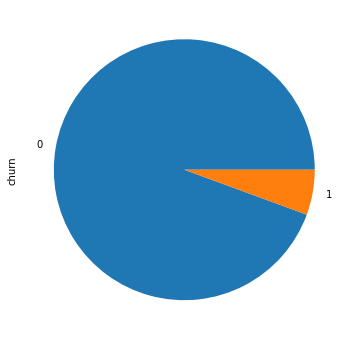

In [61]:
# After removing outliers we still maintain 5.6% of churn data 
print("Percentage of churn data\n",round(telecom_churn_hvc_cleaned.churn.value_counts(1)*100,2))
plt.figure(figsize=(6,6))
telecom_churn_hvc_cleaned.churn.value_counts().plot(kind="pie")
plt.show()

- #### Removing low variance columns(These columns have very less information and can be removed)
    - columns with 90% - 95% of the data as zero can be removed

In [62]:
telecom_churn_hvc.describe(percentiles=[0.25,0.5,0.75,0.85,0.9,0.95,0.99])

,aon,churn,no_of_days_from_last_rech,no_of_days_from_last_rech_data,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,loc_og_t2c_mou_diff,loc_og_mou_diff,std_og_t2t_mou_diff,std_og_t2m_mou_diff,std_og_t2f_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,og_others_diff,total_og_mou_diff,loc_ic_t2t_mou_diff,loc_ic_t2m_mou_diff,loc_ic_t2f_mou_diff,loc_ic_mou_diff,std_ic_t2t_mou_diff,std_ic_t2m_mou_diff,std_ic_t2f_mou_diff,std_ic_mou_diff,total_ic_mou_diff,spl_ic_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,last_day_rch_amt_diff,total_rech_data_diff,max_rech_data_diff,count_rech_2g_diff,count_rech_3g_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,arpu_3g_diff,arpu_2g_diff,monthly_2g_diff,sachet_2g_diff,monthly_3g_diff,sachet_3g_diff,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,vbc_3g_diff,total_rech_data_amt_diff
count,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000
mean,1259.349775,0.044994,4.344376,43.234083,-43.823112,-23.708948,-31.628701,-1.764185,-2.998230,-5.512742,-8.528418,-0.352089,-0.044891,-14.393413,-16.993924,-20.386904,-0.128732,-37.509826,-0.081128,0.023513,-0.257375,-52.218886,-2.509449,-2.124060,-0.785046,-5.418655,-0.983051,-1.489343,-0.144754,-2.617297,-8.251170,-0.013629,-0.161033,-0.040260,-1.550675,-63.358408,-3.789989,-5.083465,-0.169938,-5.801575,-0.125422,-0.044516,-15.189082,-22.132809,-10.669721,-5.418070,-5.661942,-0.031552,-0.093870,-0.015214,-0.029303,-0.437795,-0.428121,-0.458043,0.058549,0.075703,0.006187,0.159147,-61.253227
std,970.868556,0.207298,5.676063,37.681463,171.807458,153.070964,174.719262,26.559505,41.394843,56.011769,87.003917,6.616666,3.957855,111.294982,139.862367,143.450497,2.903059,204.040504,1.333896,8.791597,0.691157,245.866266,40.548766,69.852355,14.490502,86.985268,14.397897,22.156611,4.031428,27.045174,95.193229,0.109836,11.006027,2.156022,4.497497,221.064160,68.270341,81.918123,1.403119,53.908797,1.335750,0.424449,86.570419,172.626012,282.807356,57.158268,54.153609,0.316929,1.318811,0.268647,0.356670,0.514605,0.512246,0.514031,0.974391,0.971502,0.968638,170.308232,410.704849
min,180.000000,0.000000,0.000000,0.000000,-917.589500,-1161.970000,-1088.340000,-254.810000,-312.725000,-519.450000,-558.510000,-45.210000,-21.895000,-537.570000,-965.775000,-982.665000,-29.005000,-982.665000,-25.220000,-43.290000,-5.655000,-992.100000,-332.790000,-422.560000,-110.020000,-367.785000,-124.780000,-174.265000,-31.975000,-143.340000,-360.210000,-0.465000,-90.295000,-16.385000,-21.500000,-976.500000,-500.000000,-377.500000,-7.500000,-252.000000,-6.000000,-2.500000,-430.000000,-1140.645000,-1531.745000,-313.230000,-239.025000,-1.500000,-5.500000,-1.000000,-2.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-934.620000,-2042.000000
25%,479.000000,0.000000,1.000000,8.000000,-138.681250,-44.685000,-82.485000,0.000000,0.000000,-14.985000,-34.071250,-1.120000,-0.275000,-50.770000,-10.386250,-21.946250,0.000000,-46.301250,0.000000,-2.340000,0.000000,-134.946250,-13.760000,-29.873750,-2.761250,-42.076250,-2.395000,-6.265000,-0.080000,-9.736250,-52.956250,0.000000,0.000000,0.000000,-4.000000,

In [63]:
# Low variance columns
low_variance_col = [y for y in [x for x in telecom_churn_hvc.columns if telecom_churn_hvc[x].quantile(0.9)==0] if y not in no_outliers]

telecom_churn_hvc[low_variance_col].describe(percentiles=[0.25,0.5,0.75,0.85,0.9,0.95,0.99])

,std_og_t2f_mou_diff,isd_og_mou_diff,og_others_diff,spl_ic_mou_diff,count_rech_3g_diff,monthly_2g_diff,monthly_3g_diff,sachet_3g_diff
count,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000,17780.000000
mean,-0.128732,-0.081128,-0.257375,-0.013629,-0.044516,-0.031552,-0.015214,-0.029303
std,2.903059,1.333896,0.691157,0.109836,0.424449,0.316929,0.268647,0.356670
min,-29.005000,-25.220000,-5.655000,-0.465000,-2.500000,-1.500000,-1.000000,-2.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
85%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
90%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
95%,1.560000,0.000000,0.000000,0.140000,0.500000,0.500000,0.500000,0.000000


In [64]:
telecom_churn_hvc = telecom_churn_hvc.drop(low_variance_col,axis=1)
print(telecom_churn_hvc.shape)
telecom_churn_hvc.head()

(17780, 51)


,aon,churn,no_of_days_from_last_rech,no_of_days_from_last_rech_data,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,loc_og_t2c_mou_diff,loc_og_mou_diff,std_og_t2t_mou_diff,std_og_t2m_mou_diff,std_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_t2t_mou_diff,loc_ic_t2m_mou_diff,loc_ic_t2f_mou_diff,loc_ic_mou_diff,std_ic_t2t_mou_diff,std_ic_t2m_mou_diff,std_ic_t2f_mou_diff,std_ic_mou_diff,total_ic_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,last_day_rch_amt_diff,total_rech_data_diff,max_rech_data_diff,count_rech_2g_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,arpu_3g_diff,arpu_2g_diff,sachet_2g_diff,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,vbc_3g_diff,total_rech_data_amt_diff
8,315,0,1.0,8.0,-298.1100,-347.280,48.835,0.0,0.0,-244.870,-25.230,0.000,7.15,-270.095,-102.415,63.825,-38.590,10.23,-298.450,-16.530,-20.300,0.000,-36.840,-0.190,-12.605,0.0,-12.795,-49.635,0.000,0.000,-6.0,-399.0,-92.0,-15.0,2.0,-54.0,2.0,-19.5,-177.97,-363.535,19.830,0.00,2.5,-1.0,0.0,0.0,-1.0,1.0,1.0,-495.375,30.0
21,720,0,0.0,92.0,81.6570,-32.120,156.085,0.0,0.0,18.020,14.940,1.205,0.00,34.175,-50.145,139.940,89.800,0.00,123.975,13.205,32.730,6.665,52.605,-9.840,48.780,0.0,38.945,91.550,0.000,0.000,3.0,78.0,0.0,25.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.00,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.000,0.0
23,604,0,7.0,25.0,232.8425,-16.230,118.505,0.0,0.0,-16.230,65.585,0.000,17.71,49.345,0.000,35.255,35.255,17.66,102.270,35.765,42.205,0.710,78.690,13.125,35.250,0.0,48.375,127.095,-10.375,10.385,0.0,212.0,89.5,-89.5,1.0,89.5,0.0,92.0,-0.23,710.375,43.985,-0.22,0.0,-1.0,0.0,0.0,-1.0,1.0,1.0,14.520,184.0
38,1155,0,7.0,92.0,-31.3635,231.905,28.090,0.0,0.0,-14.125,-6.015,0.000,0.00,-20.145,246.020,34.105,280.130,0.00,259.990,-8.875,0.700,0.000,-8.175,-6.360,3.150,0.0,-3.210,-19.725,-8.340,0.000,-18.5,-112.0,60.0,110.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.00,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.000,0.0
61,1131,0,8.0,24.0,-47.0005,-32.500,29.200,0.0,0.0,-32.500,34.505,-6.470,0.00,-4.470,0.000,-0.080,1.170,-1.30,-5.890,1.080,178.275,-56.515,122.840,1.205,2.455,27.6,31.265,137.540,-7.280,-9.280,-6.0,-65.0,0.0,60.0,-0.5,0.0,-0.5,-12.5,-317.82,0.000,0.000,-25.70,-0.5,0.0,0.0,0.0,1.0,1.0,1.0,0.000,-102.0


### 3.)Data Analysis

- #### Observing the distribution of Attributes
    -  Here after removing the major outliers we see that the remaining values can be considered as natural outliers.
    -  We can also observe there are few variables which are targeted to specific group of customers and most of the customers (common people) generally dont use these reacharges (ex: roaming, std calls, isd calls etc)
    - we can observe the distribution of derived variable, here we can observe user whether the user is consistently using the services or not happy with serivices.
    - Here we can observe that mostly ratio of people who are dissatisfied is equal to the people who are satisfied but the the churn probability is completely imbalanced

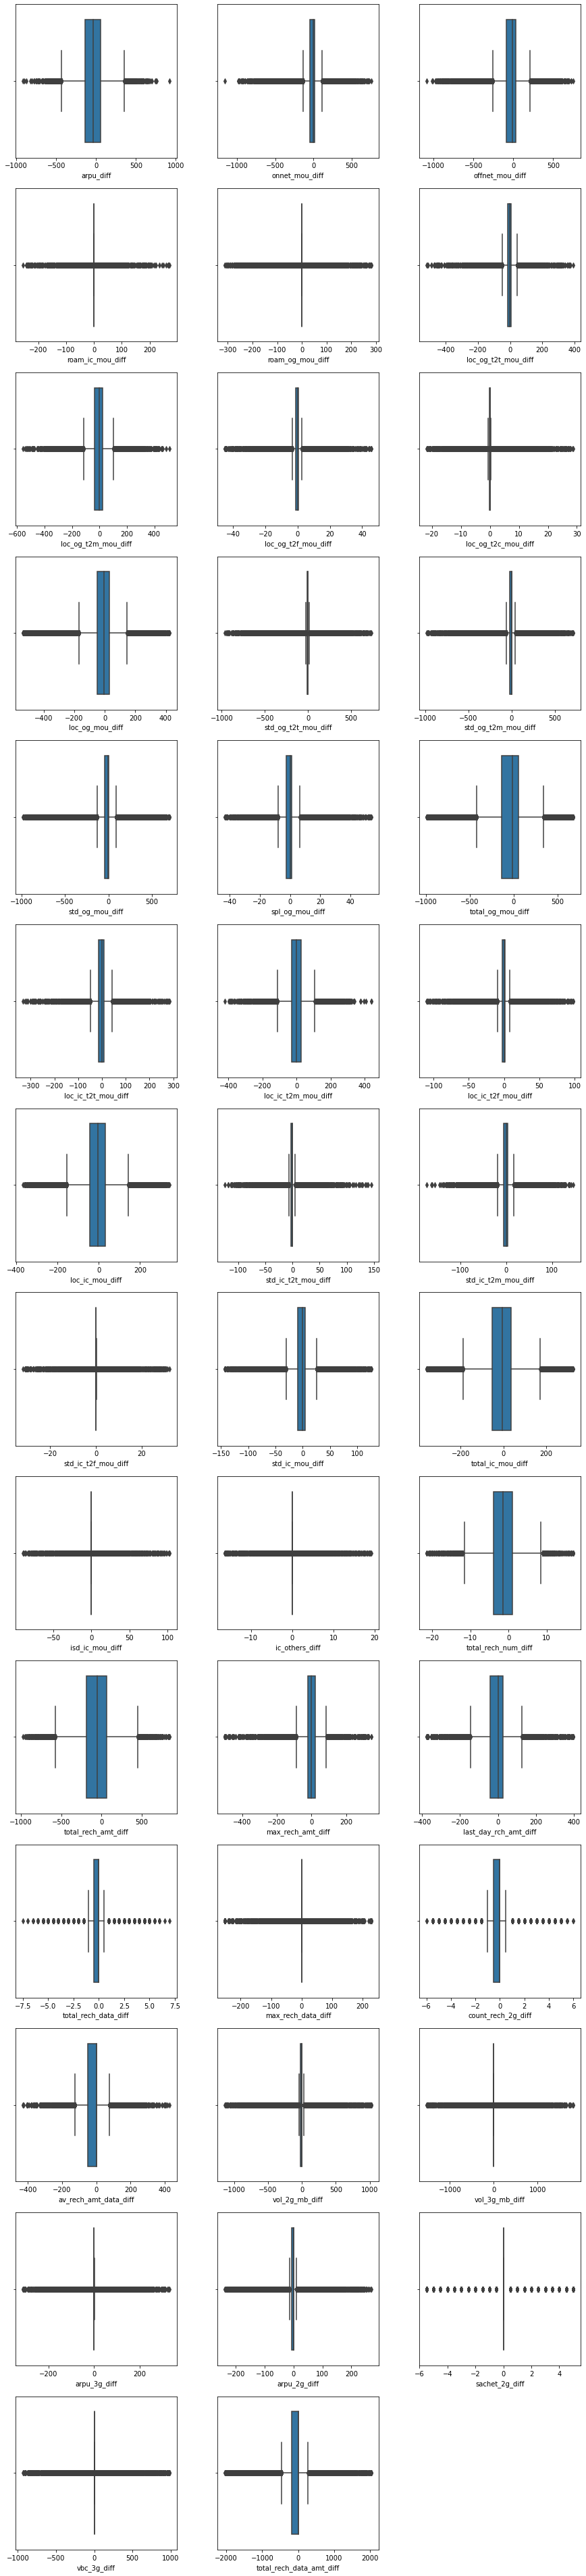

In [65]:
# ploting the distribution of the variables
plt.figure(figsize=(15,250))
plt.subplots_adjust(wspace=0.25)
pltno = 1
for i in telecom_churn_hvc.columns:
    if i not in no_outliers:
        plt.subplot(50,3,pltno)
        sns.boxplot(telecom_churn_hvc[i],orient="v")
        pltno+=1
plt.show()

As per the above box plots, outliers exists in the data, which are natural outliers


In [66]:
# Function for annotating the bar's in a bar graph
def annotate(plots):
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.2f'),  
                       (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                       ha='center', va='center', 
                       size=10, xytext=(0, -6), 
                       textcoords='offset points')

In [67]:
num_var = [x for x in telecom_churn_hvc.columns if telecom_churn_hvc[x].unique().size>10]
num_var

['aon',
 'no_of_days_from_last_rech',
 'no_of_days_from_last_rech_data',
 'arpu_diff',
 'onnet_mou_diff',
 'offnet_mou_diff',
 'roam_ic_mou_diff',
 'roam_og_mou_diff',
 'loc_og_t2t_mou_diff',
 'loc_og_t2m_mou_diff',
 'loc_og_t2f_mou_diff',
 'loc_og_t2c_mou_diff',
 'loc_og_mou_diff',
 'std_og_t2t_mou_diff',
 'std_og_t2m_mou_diff',
 'std_og_mou_diff',
 'spl_og_mou_diff',
 'total_og_mou_diff',
 'loc_ic_t2t_mou_diff',
 'loc_ic_t2m_mou_diff',
 'loc_ic_t2f_mou_diff',
 'loc_ic_mou_diff',
 'std_ic_t2t_mou_diff',
 'std_ic_t2m_mou_diff',
 'std_ic_t2f_mou_diff',
 'std_ic_mou_diff',
 'total_ic_mou_diff',
 'isd_ic_mou_diff',
 'ic_others_diff',
 'total_rech_num_diff',
 'total_rech_amt_diff',
 'max_rech_amt_diff',
 'last_day_rch_amt_diff',
 'total_rech_data_diff',
 'max_rech_data_diff',
 'count_rech_2g_diff',
 'av_rech_amt_data_diff',
 'vol_2g_mb_diff',
 'vol_3g_mb_diff',
 'arpu_3g_diff',
 'arpu_2g_diff',
 'sachet_2g_diff',
 'vbc_3g_diff',
 'total_rech_data_amt_diff']

- #### Here our derived variable is measure of the usability of the feature i.e., if the value of the derived variable is a positive value that means user is consistently using the services where as if the value is a negative value then we can assume that user is not happy with serivices and the usage has been reduced
- #### In most of the cases we can see that more of the chruning is associated with the bins mostly consisting of negative values i.e., dissatisfied people

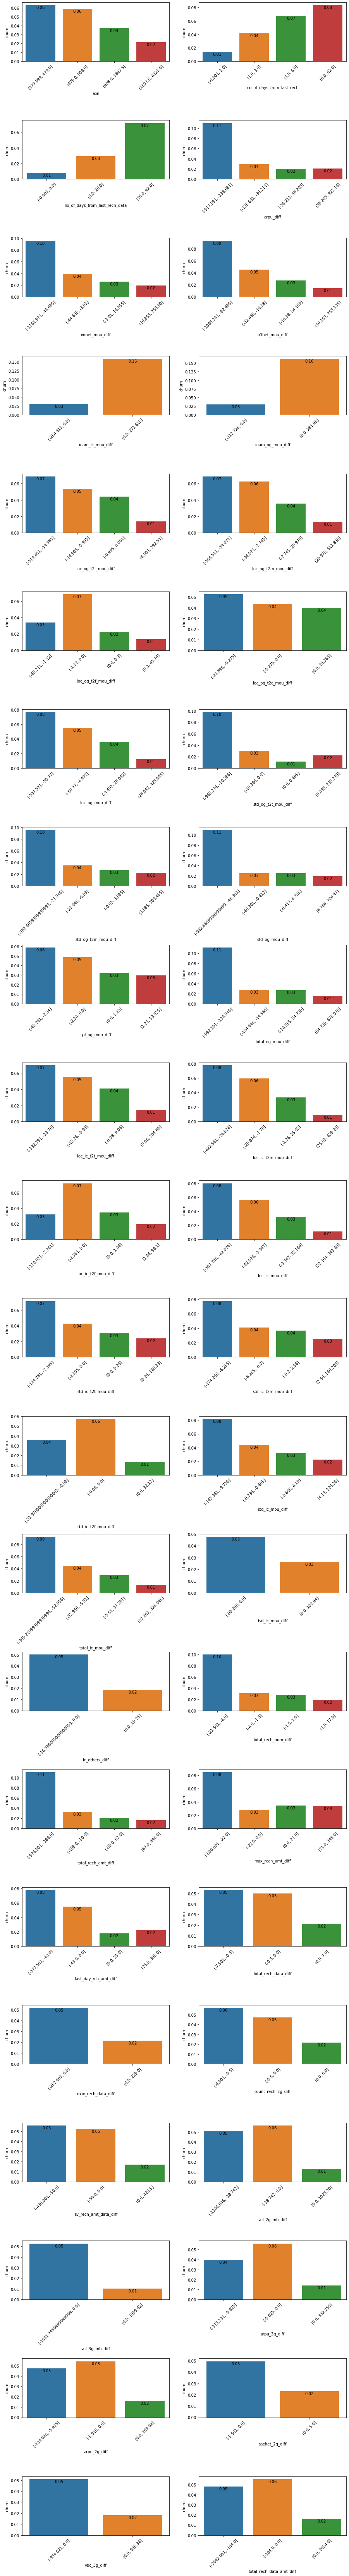

In [68]:
plt.figure(figsize=(15,400))
plt.subplots_adjust(hspace=1)
pltno = 1
for i in telecom_churn_hvc[num_var].columns:
    plt.subplot(72,2,pltno)
    plt.xticks(rotation=45)
    plots = sns.barplot(pd.qcut(telecom_churn_hvc[i],4,duplicates="drop"),telecom_churn_hvc.churn,ci=None)
    annotate(plots)
    pltno+=1
plt.show()

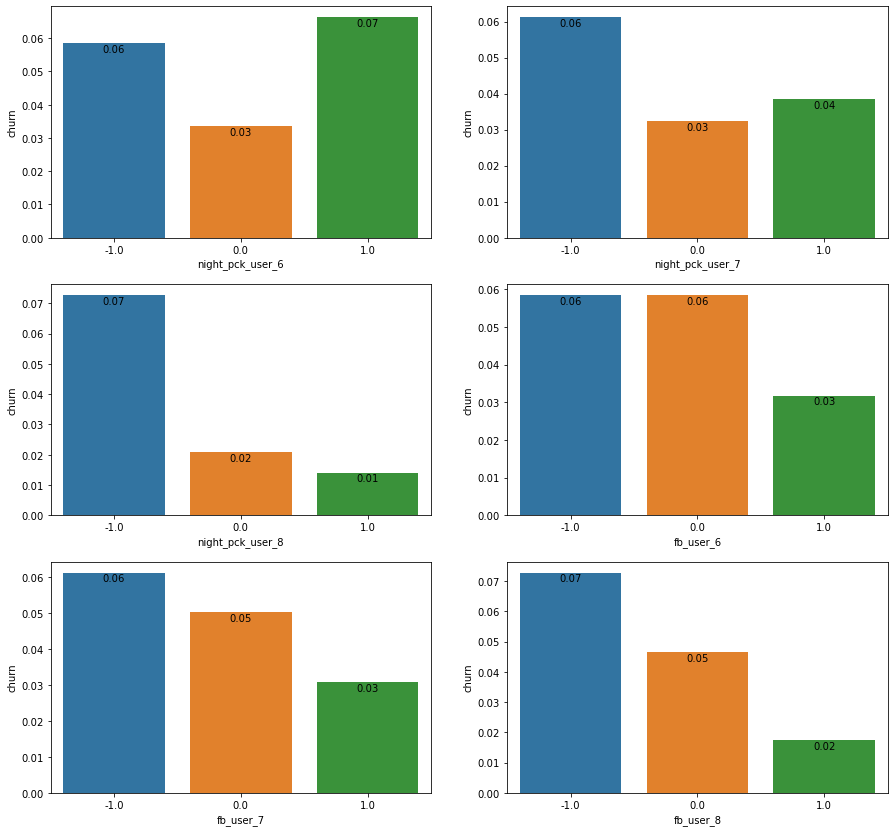

In [69]:
cat_var = telecom_churn_hvc.columns[~telecom_churn_hvc.columns.isin(num_var)]
plt.figure(figsize=(15,40))
pltno = 1
for i in telecom_churn_hvc[cat_var].columns:
    if i != "churn":
        plt.subplot(8,2,pltno)
        plots = sns.barplot(telecom_churn_hvc[i],telecom_churn_hvc.churn,ci=None)
        annotate(plots)
        pltno+=1
plt.show()

Compared to 6 month, 7th and 8th month had less churn customers for night pack and fb users.

In [70]:
# Verifying the churn ratio
print("Churn Ratio:")
print(telecom_churn_hvc.churn.value_counts()*100/telecom_churn_hvc.churn.shape[0])

Churn Ratio:
0    95.500562
1     4.499438
Name: churn, dtype: float64


This is heavily imbalanced data, as the non-churn count is more compared to churn customers

### 4.) Model Building

#### Data Preparation

In [123]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, recall_score
from sklearn.model_selection import KFold

In [72]:
print(telecom_churn_hvc.shape)
telecom_churn_hvc.head()

(17780, 51)


,aon,churn,no_of_days_from_last_rech,no_of_days_from_last_rech_data,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,loc_og_t2c_mou_diff,loc_og_mou_diff,std_og_t2t_mou_diff,std_og_t2m_mou_diff,std_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_t2t_mou_diff,loc_ic_t2m_mou_diff,loc_ic_t2f_mou_diff,loc_ic_mou_diff,std_ic_t2t_mou_diff,std_ic_t2m_mou_diff,std_ic_t2f_mou_diff,std_ic_mou_diff,total_ic_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,last_day_rch_amt_diff,total_rech_data_diff,max_rech_data_diff,count_rech_2g_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,arpu_3g_diff,arpu_2g_diff,sachet_2g_diff,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,vbc_3g_diff,total_rech_data_amt_diff
8,315,0,1.0,8.0,-298.1100,-347.280,48.835,0.0,0.0,-244.870,-25.230,0.000,7.15,-270.095,-102.415,63.825,-38.590,10.23,-298.450,-16.530,-20.300,0.000,-36.840,-0.190,-12.605,0.0,-12.795,-49.635,0.000,0.000,-6.0,-399.0,-92.0,-15.0,2.0,-54.0,2.0,-19.5,-177.97,-363.535,19.830,0.00,2.5,-1.0,0.0,0.0,-1.0,1.0,1.0,-495.375,30.0
21,720,0,0.0,92.0,81.6570,-32.120,156.085,0.0,0.0,18.020,14.940,1.205,0.00,34.175,-50.145,139.940,89.800,0.00,123.975,13.205,32.730,6.665,52.605,-9.840,48.780,0.0,38.945,91.550,0.000,0.000,3.0,78.0,0.0,25.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.00,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.000,0.0
23,604,0,7.0,25.0,232.8425,-16.230,118.505,0.0,0.0,-16.230,65.585,0.000,17.71,49.345,0.000,35.255,35.255,17.66,102.270,35.765,42.205,0.710,78.690,13.125,35.250,0.0,48.375,127.095,-10.375,10.385,0.0,212.0,89.5,-89.5,1.0,89.5,0.0,92.0,-0.23,710.375,43.985,-0.22,0.0,-1.0,0.0,0.0,-1.0,1.0,1.0,14.520,184.0
38,1155,0,7.0,92.0,-31.3635,231.905,28.090,0.0,0.0,-14.125,-6.015,0.000,0.00,-20.145,246.020,34.105,280.130,0.00,259.990,-8.875,0.700,0.000,-8.175,-6.360,3.150,0.0,-3.210,-19.725,-8.340,0.000,-18.5,-112.0,60.0,110.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.00,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.000,0.0
61,1131,0,8.0,24.0,-47.0005,-32.500,29.200,0.0,0.0,-32.500,34.505,-6.470,0.00,-4.470,0.000,-0.080,1.170,-1.30,-5.890,1.080,178.275,-56.515,122.840,1.205,2.455,27.6,31.265,137.540,-7.280,-9.280,-6.0,-65.0,0.0,60.0,-0.5,0.0,-0.5,-12.5,-317.82,0.000,0.000,-25.70,-0.5,0.0,0.0,0.0,1.0,1.0,1.0,0.000,-102.0


- #### Splitting the Data into Training and Testing Sets

In [73]:
y = telecom_churn_hvc.pop("churn")
X = telecom_churn_hvc

In [74]:
print(X.shape)
X.head()

(17780, 50)


,aon,no_of_days_from_last_rech,no_of_days_from_last_rech_data,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,loc_og_t2c_mou_diff,loc_og_mou_diff,std_og_t2t_mou_diff,std_og_t2m_mou_diff,std_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_t2t_mou_diff,loc_ic_t2m_mou_diff,loc_ic_t2f_mou_diff,loc_ic_mou_diff,std_ic_t2t_mou_diff,std_ic_t2m_mou_diff,std_ic_t2f_mou_diff,std_ic_mou_diff,total_ic_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,last_day_rch_amt_diff,total_rech_data_diff,max_rech_data_diff,count_rech_2g_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,arpu_3g_diff,arpu_2g_diff,sachet_2g_diff,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,vbc_3g_diff,total_rech_data_amt_diff
8,315,1.0,8.0,-298.1100,-347.280,48.835,0.0,0.0,-244.870,-25.230,0.000,7.15,-270.095,-102.415,63.825,-38.590,10.23,-298.450,-16.530,-20.300,0.000,-36.840,-0.190,-12.605,0.0,-12.795,-49.635,0.000,0.000,-6.0,-399.0,-92.0,-15.0,2.0,-54.0,2.0,-19.5,-177.97,-363.535,19.830,0.00,2.5,-1.0,0.0,0.0,-1.0,1.0,1.0,-495.375,30.0
21,720,0.0,92.0,81.6570,-32.120,156.085,0.0,0.0,18.020,14.940,1.205,0.00,34.175,-50.145,139.940,89.800,0.00,123.975,13.205,32.730,6.665,52.605,-9.840,48.780,0.0,38.945,91.550,0.000,0.000,3.0,78.0,0.0,25.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.00,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.000,0.0
23,604,7.0,25.0,232.8425,-16.230,118.505,0.0,0.0,-16.230,65.585,0.000,17.71,49.345,0.000,35.255,35.255,17.66,102.270,35.765,42.205,0.710,78.690,13.125,35.250,0.0,48.375,127.095,-10.375,10.385,0.0,212.0,89.5,-89.5,1.0,89.5,0.0,92.0,-0.23,710.375,43.985,-0.22,0.0,-1.0,0.0,0.0,-1.0,1.0,1.0,14.520,184.0
38,1155,7.0,92.0,-31.3635,231.905,28.090,0.0,0.0,-14.125,-6.015,0.000,0.00,-20.145,246.020,34.105,280.130,0.00,259.990,-8.875,0.700,0.000,-8.175,-6.360,3.150,0.0,-3.210,-19.725,-8.340,0.000,-18.5,-112.0,60.0,110.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.00,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.000,0.0
61,1131,8.0,24.0,-47.0005,-32.500,29.200,0.0,0.0,-32.500,34.505,-6.470,0.00,-4.470,0.000,-0.080,1.170,-1.30,-5.890,1.080,178.275,-56.515,122.840,1.205,2.455,27.6,31.265,137.540,-7.280,-9.280,-6.0,-65.0,0.0,60.0,-0.5,0.0,-0.5,-12.5,-317.82,0.000,0.000,-25.70,-0.5,0.0,0.0,0.0,1.0,1.0,1.0,0.000,-102.0


In [75]:
# target varaible
y

8        0
21       0
23       0
38       0
61       0
        ..
99963    0
99965    0
99970    0
99981    0
99984    0
Name: churn, Length: 17780, dtype: int32

In [76]:
# Splitting the data such that we have equal churn percentage in train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,test_size = 0.3,random_state = 100,stratify=y)

In [77]:
# equal churn percentage in train and test sets# 
print("Training data target value churn percentage\n",(y_train.value_counts(1)*100))
print("\nTest data target value churn percentage\n",(y_train.value_counts(1)*100))

Training data target value churn percentage
 0    95.500562
1     4.499438
Name: churn, dtype: float64

Test data target value churn percentage
 0    95.500562
1     4.499438
Name: churn, dtype: float64


In [78]:
print(X_train.shape)
X_train.head()

(12446, 50)


,aon,no_of_days_from_last_rech,no_of_days_from_last_rech_data,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,loc_og_t2c_mou_diff,loc_og_mou_diff,std_og_t2t_mou_diff,std_og_t2m_mou_diff,std_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_t2t_mou_diff,loc_ic_t2m_mou_diff,loc_ic_t2f_mou_diff,loc_ic_mou_diff,std_ic_t2t_mou_diff,std_ic_t2m_mou_diff,std_ic_t2f_mou_diff,std_ic_mou_diff,total_ic_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,last_day_rch_amt_diff,total_rech_data_diff,max_rech_data_diff,count_rech_2g_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,arpu_3g_diff,arpu_2g_diff,sachet_2g_diff,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,vbc_3g_diff,total_rech_data_amt_diff
55841,821,2.0,4.0,-12.1495,0.660,7.360,0.00,0.00,0.660,7.360,0.00,0.00,8.030,0.000,0.000,0.000,0.000,7.815,3.905,-62.580,-2.755,-61.430,0.000,0.000,0.00,0.000,-61.430,0.00,0.000,-1.5,4.5,-10.5,-5.0,-0.5,-10.5,0.0,-12.0,-145.55,0.000,-10.955,-17.815,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.00,-316.0
22653,204,11.0,11.0,16.5330,11.950,9.865,0.00,0.00,9.480,12.065,-2.20,0.00,19.345,2.460,0.000,2.460,0.000,21.815,7.415,36.655,-8.250,35.830,0.000,-0.575,3.38,2.805,35.235,-2.58,-0.735,-1.0,63.5,13.5,13.5,0.5,13.5,0.0,89.5,11.07,199.145,19.315,29.830,0.5,0.0,0.0,0.0,1.0,1.0,1.0,135.47,241.5
25496,749,2.0,2.0,100.8405,0.440,-32.885,0.00,0.00,0.700,-24.295,0.00,-0.30,-23.600,-0.255,-8.285,-8.545,-0.300,-32.455,4.035,-55.520,-1.625,-53.125,2.490,-35.445,0.00,-32.955,-86.095,0.00,0.000,-6.0,123.0,170.5,173.0,-2.5,173.0,-2.5,110.5,329.63,-65.815,0.000,10.465,-3.5,0.0,0.0,0.0,1.0,1.0,1.0,-69.59,29.5
64157,394,1.0,92.0,8.1975,-2.170,-107.330,0.00,0.00,1.905,-8.990,-0.89,1.51,-7.985,-4.065,-103.730,-107.805,6.225,-109.555,5.175,-21.350,-4.270,-20.440,-2.370,-84.810,0.00,-87.180,-108.350,0.00,-0.980,9.0,-83.0,50.0,-119.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.000,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.00,0.0
4292,717,0.0,92.0,427.8875,132.975,544.610,-103.71,242.57,18.100,44.870,0.00,19.51,62.980,-6.890,340.250,333.360,51.300,447.630,22.585,17.945,0.125,40.660,9.315,3.315,0.00,12.630,53.605,0.00,0.310,9.0,684.0,20.0,80.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.000,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.00,0.0


In [79]:
print(X_test.shape)
X_test.head()

(5334, 50)


,aon,no_of_days_from_last_rech,no_of_days_from_last_rech_data,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,loc_og_t2c_mou_diff,loc_og_mou_diff,std_og_t2t_mou_diff,std_og_t2m_mou_diff,std_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_t2t_mou_diff,loc_ic_t2m_mou_diff,loc_ic_t2f_mou_diff,loc_ic_mou_diff,std_ic_t2t_mou_diff,std_ic_t2m_mou_diff,std_ic_t2f_mou_diff,std_ic_mou_diff,total_ic_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,last_day_rch_amt_diff,total_rech_data_diff,max_rech_data_diff,count_rech_2g_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,arpu_3g_diff,arpu_2g_diff,sachet_2g_diff,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,vbc_3g_diff,total_rech_data_amt_diff
35883,371,4.0,92.0,117.8950,1.925,33.945,0.00,0.00,1.925,40.820,-1.610,0.000,41.135,0.000,-5.260,-5.260,0.000,35.73,-10.115,-42.300,17.515,-34.895,1.730,-41.390,-1.405,-41.065,-50.330,25.560,0.060,4.0,255.0,15.0,55.0,0.0,0.0,0.0,0.0,0.000,0.00,0.000,0.00,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.000,0.0
63648,1096,4.0,92.0,102.1845,-9.820,319.060,0.00,0.00,10.315,-30.800,-0.730,-0.075,-21.220,-20.145,350.670,330.520,-0.075,309.23,-59.780,-19.300,8.495,-70.570,0.430,-16.210,-0.265,-16.040,-83.390,-4.490,7.725,-0.5,1.0,41.0,11.0,0.0,0.0,0.0,0.0,0.000,0.00,0.000,0.00,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.000,0.0
5836,1791,6.0,6.0,-195.6990,128.590,-377.425,0.00,0.00,-68.905,-10.905,-2.745,3.310,-82.555,197.490,-367.070,-169.575,3.285,-248.83,-72.280,17.275,0.325,-54.685,-0.965,-39.535,0.000,-40.495,-116.040,-18.975,-1.875,-2.5,-218.5,18.0,-67.0,1.0,0.0,1.0,23.0,0.000,0.00,0.000,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,69.0
62525,239,6.0,92.0,214.5000,53.385,65.720,0.00,0.00,53.385,59.155,0.880,0.000,113.420,0.000,-2.300,-2.300,23.765,134.89,13.870,24.980,0.000,38.860,0.000,-2.075,0.000,-2.075,36.540,0.000,-0.130,-1.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00,0.000,0.00,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.000,0.0
22592,719,6.0,52.0,-102.4560,-67.705,-26.525,2.35,2.71,0.140,47.195,-0.040,-0.600,47.305,-67.855,-76.285,-144.135,1.015,-95.81,-1.650,24.550,44.145,67.060,-1.795,13.735,0.000,11.945,79.035,0.000,0.030,-12.0,-88.0,10.0,-35.0,-4.0,-17.0,-4.0,-62.0,-260.655,-461.85,-2.225,-24.95,-4.0,0.0,0.0,-1.0,1.0,1.0,-1.0,-406.155,-304.0


- #### Scaling the numerical vairables of the data

In [80]:
scaler = MinMaxScaler()

In [81]:
print(X_train.shape)
X_train.head()

(12446, 50)


,aon,no_of_days_from_last_rech,no_of_days_from_last_rech_data,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,loc_og_t2c_mou_diff,loc_og_mou_diff,std_og_t2t_mou_diff,std_og_t2m_mou_diff,std_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_t2t_mou_diff,loc_ic_t2m_mou_diff,loc_ic_t2f_mou_diff,loc_ic_mou_diff,std_ic_t2t_mou_diff,std_ic_t2m_mou_diff,std_ic_t2f_mou_diff,std_ic_mou_diff,total_ic_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,last_day_rch_amt_diff,total_rech_data_diff,max_rech_data_diff,count_rech_2g_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,arpu_3g_diff,arpu_2g_diff,sachet_2g_diff,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,vbc_3g_diff,total_rech_data_amt_diff
55841,821,2.0,4.0,-12.1495,0.660,7.360,0.00,0.00,0.660,7.360,0.00,0.00,8.030,0.000,0.000,0.000,0.000,7.815,3.905,-62.580,-2.755,-61.430,0.000,0.000,0.00,0.000,-61.430,0.00,0.000,-1.5,4.5,-10.5,-5.0,-0.5,-10.5,0.0,-12.0,-145.55,0.000,-10.955,-17.815,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.00,-316.0
22653,204,11.0,11.0,16.5330,11.950,9.865,0.00,0.00,9.480,12.065,-2.20,0.00,19.345,2.460,0.000,2.460,0.000,21.815,7.415,36.655,-8.250,35.830,0.000,-0.575,3.38,2.805,35.235,-2.58,-0.735,-1.0,63.5,13.5,13.5,0.5,13.5,0.0,89.5,11.07,199.145,19.315,29.830,0.5,0.0,0.0,0.0,1.0,1.0,1.0,135.47,241.5
25496,749,2.0,2.0,100.8405,0.440,-32.885,0.00,0.00,0.700,-24.295,0.00,-0.30,-23.600,-0.255,-8.285,-8.545,-0.300,-32.455,4.035,-55.520,-1.625,-53.125,2.490,-35.445,0.00,-32.955,-86.095,0.00,0.000,-6.0,123.0,170.5,173.0,-2.5,173.0,-2.5,110.5,329.63,-65.815,0.000,10.465,-3.5,0.0,0.0,0.0,1.0,1.0,1.0,-69.59,29.5
64157,394,1.0,92.0,8.1975,-2.170,-107.330,0.00,0.00,1.905,-8.990,-0.89,1.51,-7.985,-4.065,-103.730,-107.805,6.225,-109.555,5.175,-21.350,-4.270,-20.440,-2.370,-84.810,0.00,-87.180,-108.350,0.00,-0.980,9.0,-83.0,50.0,-119.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.000,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.00,0.0
4292,717,0.0,92.0,427.8875,132.975,544.610,-103.71,242.57,18.100,44.870,0.00,19.51,62.980,-6.890,340.250,333.360,51.300,447.630,22.585,17.945,0.125,40.660,9.315,3.315,0.00,12.630,53.605,0.00,0.310,9.0,684.0,20.0,80.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.000,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.00,0.0


In [82]:
cat_var_1 = [x for x in telecom_churn_hvc.columns if telecom_churn_hvc[x].unique().size<=5]
cat_var_1

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

In [83]:
X_train_scaled = X_train.copy()

In [84]:
X_train_scaled[X_train_scaled.columns[~X_train_scaled.columns.isin(cat_var_1)]] = scaler.fit_transform(X_train_scaled[X_train_scaled.columns[~X_train_scaled.columns.isin(cat_var_1)]])
print(X_train.shape)
X_train_scaled.head()

(12446, 50)


,aon,no_of_days_from_last_rech,no_of_days_from_last_rech_data,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,loc_og_t2c_mou_diff,loc_og_mou_diff,std_og_t2t_mou_diff,std_og_t2m_mou_diff,std_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_t2t_mou_diff,loc_ic_t2m_mou_diff,loc_ic_t2f_mou_diff,loc_ic_mou_diff,std_ic_t2t_mou_diff,std_ic_t2m_mou_diff,std_ic_t2f_mou_diff,std_ic_mou_diff,total_ic_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,last_day_rch_amt_diff,total_rech_data_diff,max_rech_data_diff,count_rech_2g_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,arpu_3g_diff,arpu_2g_diff,sachet_2g_diff,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,vbc_3g_diff,total_rech_data_amt_diff
55841,0.154794,0.032258,0.043478,0.492154,0.605332,0.579600,0.484039,0.525849,0.570309,0.528680,0.497086,0.432195,0.564884,0.567585,0.582230,0.582446,0.445760,0.598092,0.545299,0.417688,0.515400,0.432305,0.461960,0.551533,0.491021,0.530679,0.434867,0.464927,0.465087,0.519481,0.538272,0.579290,0.480335,0.482759,0.502079,0.500000,0.486896,0.460502,0.461236,0.471561,0.434644,0.523810,0.0,0.0,0.0,1.0,1.0,1.0,0.486032,0.423454
22653,0.005796,0.177419,0.119565,0.507744,0.611210,0.581012,0.484039,0.525849,0.579980,0.533076,0.472897,0.432195,0.576690,0.569031,0.582230,0.583904,0.445760,0.606476,0.550984,0.532831,0.488997,0.569551,0.461960,0.549713,0.544498,0.541097,0.575561,0.451516,0.444224,0.532468,0.570645,0.607692,0.504191,0.551724,0.551975,0.500000,0.605125,0.532982,0.521202,0.518783,0.528259,0.571429,0.0,0.0,0.0,1.0,1.0,1.0,0.556481,0.560231
25496,0.137406,0.032258,0.021739,0.553570,0.605217,0.556913,0.484039,0.525849,0.570352,0.499105,0.497086,0.426273,0.531881,0.567436,0.577321,0.577381,0.442671,0.573977,0.545510,0.425880,0.520829,0.444024,0.471178,0.439352,0.491021,0.408279,0.398968,0.464927,0.465087,0.402597,0.603292,0.793491,0.709865,0.344828,0.883576,0.291667,0.629586,0.680403,0.441418,0.488651,0.490210,0.190476,0.0,0.0,0.0,1.0,1.0,1.0,0.449843,0.508219
64157,0.051678,0.016129,1.000000,0.503214,0.603858,0.514948,0.484039,0.525849,0.571674,0.513405,0.487301,0.462002,0.548174,0.565196,0.520770,0.518548,0.509859,0.527808,0.547356,0.465527,0.508120,0.490147,0.453186,0.283117,0.491021,0.206879,0.366576,0.464927,0.437269,0.792208,0.490261,0.650888,0.333333,0.517241,0.523909,0.500000,0.500874,0.527859,0.461236,0.488651,0.469648,0.523810,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.486032,0.500981
4292,0.129679,0.000000,1.000000,0.731337,0.674222,0.882453,0.287030,0.933732,0.589432,0.563725,0.497086,0.817311,0.622219,0.563536,0.783829,0.780035,0.974000,0.861465,0.575553,0.511122,0.529238,0.576366,0.496446,0.562024,0.491021,0.577589,0.602298,0.464927,0.473886,0.792208,0.911111,0.615385,0.589942,0.517241,0.523909,0.500000,0.500874,0.527859,0.461236,0.488651,0.469648,0.523810,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.486032,0.500981


In [85]:
X_train_scaled.describe()

,aon,no_of_days_from_last_rech,no_of_days_from_last_rech_data,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,loc_og_t2c_mou_diff,loc_og_mou_diff,std_og_t2t_mou_diff,std_og_t2m_mou_diff,std_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_t2t_mou_diff,loc_ic_t2m_mou_diff,loc_ic_t2f_mou_diff,loc_ic_mou_diff,std_ic_t2t_mou_diff,std_ic_t2m_mou_diff,std_ic_t2f_mou_diff,std_ic_mou_diff,total_ic_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,last_day_rch_amt_diff,total_rech_data_diff,max_rech_data_diff,count_rech_2g_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,arpu_3g_diff,arpu_2g_diff,sachet_2g_diff,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,vbc_3g_diff,total_rech_data_amt_diff
count,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000,12446.000000
mean,0.259282,0.070567,0.470934,0.474936,0.593109,0.556953,0.480921,0.521843,0.563511,0.513502,0.493293,0.431056,0.541094,0.557996,0.569459,0.559905,0.445913,0.561602,0.534793,0.488118,0.524457,0.511466,0.458514,0.546845,0.488248,0.521069,0.512453,0.464189,0.463732,0.518113,0.501334,0.587488,0.480984,0.506212,0.511743,0.490291,0.483318,0.517882,0.458381,0.480352,0.458760,0.515901,-0.436445,-0.431143,-0.457978,0.060260,0.071027,0.005865,0.486582,0.486293
std,0.233635,0.092330,0.410222,0.094047,0.080304,0.098987,0.051248,0.068900,0.060737,0.080692,0.073086,0.079202,0.115340,0.082887,0.085562,0.122132,0.091076,0.148106,0.065916,0.081595,0.069646,0.123149,0.053321,0.069930,0.062241,0.100288,0.138862,0.056617,0.060858,0.117181,0.121711,0.080543,0.106175,0.096697,0.111911,0.110932,0.100740,0.080154,0.085834,0.089630,0.106615,0.125121,0.515819,0.512949,0.514750,0.974517,0.972718,0.968801,0.089269,0.101502
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000
25%,0.071480,0.016129,0.086957,0.423466,0.581666,0.528302,0.484039,0.525849,0.552956,0.489637,0.485005,0.426767,0.502537,0.561418,0.568515,0.554106,0.421408,0.511114,0.516570,0.455740,0.515352,0.460425,0.452839,0.531657,0.489756,0.494503,0.447841,0.464927,0.464661,0.467532,0.433196,0.565680,0.431335,0.482759,0.523909,0.458333,0.443797,0.519696,0.461236,0.487309,0.458338,0.523810,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.486032,0.457311
50%,0.174837,0.048387,0.282609,0.478439,0.603388,0.569235,0.484039,0.525849,0.568362,0.518919,0.497086,0.432195,0.551208,0.567585,0.582199,0.582154,0.445760,0.584279,0.537307,0.488565,0.528637,0.513981,0.461960,0.550915,0.491021,0.528283,0.516087,0.464927,0.465087,0.519481,0.508093,0.591716,0.486783,0.517241,0.523909,0.500000,0.500874,0.527859,0.461236,0.488651,0.469648,0.523810,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.486032,0.500981
75%,0.411434,0.096774,1.000000,0.530677,0.613831,0.594195,0.484039,0.525849,0.578250,0.541225,0.500220,0.432195,0.585216,0.567887,0.584425,0.586397,0.458529,0.625660,0.553559,0.519670,

#### Building Predictive model

In [86]:
# Using PCA for dimension reduction(95% variance)
pca = PCA(0.95)

In [87]:
X_train_pca = pca.fit_transform(X_train_scaled)

In [88]:
pca.explained_variance_ratio_

array([0.70344348, 0.10481324, 0.07942812, 0.01894169, 0.01293999,
       0.00977899, 0.00846263, 0.00792476, 0.00648787])

In [89]:
print(X_train_pca.shape)
X_train_pca

(12446, 9)


array([[ 1.87034812,  0.02907178,  0.05047111, ..., -0.09064959,
        -0.07114625, -0.05574235],
       [ 1.85438255,  0.05911649,  0.06968404, ..., -0.1248736 ,
         0.12060107,  0.1297587 ],
       [ 1.87644971,  0.05027848,  0.06341384, ...,  0.02388683,
        -0.29986968,  0.33727705],
       ...,
       [ 1.87875294,  0.08132747,  0.0731667 , ..., -0.06970879,
         0.18708755,  0.11024582],
       [ 1.87858627,  0.06705912,  0.06829494, ..., -0.18028679,
        -0.06605419,  0.03704359],
       [ 1.86613131,  0.02414324,  0.04887142, ..., -0.18062936,
        -0.14949778, -0.00811219]])

### LogisticRegression

In [90]:
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [91]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [92]:

y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[5042   52]
 [ 223   17]]
0.9484439445069366
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      5094
           1       0.25      0.07      0.11       240

    accuracy                           0.95      5334
   macro avg       0.60      0.53      0.54      5334
weighted avg       0.93      0.95      0.93      5334



### Random Forest

### Hyperparameter tuning for the model

- ##### 1
    - Tuning the Hyper parameters for Random Forest

In [93]:
rf = RandomForestClassifier(oob_score=True, random_state=100)

In [94]:
params_dt ={"n_estimators": [100,300],
            "max_depth": [5,10,20,30,40],
            "min_samples_split": list(range(0,201,50)),
            "min_samples_leaf": list(range(0,201,50)),
            "class_weight" : ["balanced", "balanced_subsample"],
            "max_features": [2,4,6,8]
            }

model_cv_rf = GridSearchCV(
                        estimator= rf,
                        param_grid= params_dt,
                        scoring= "recall",
                        n_jobs=-1,
                        cv= 4,
                        verbose= 1,
                        return_train_score= True,
                            )

In [95]:
model_cv_rf.fit(X_train_pca,y_train)

Fitting 4 folds for each of 2000 candidates, totalling 8000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 67.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 74.6min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 89.8min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 117.8min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 159.8min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 219.5min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 241.7min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 323.0min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 426.7min
[Parallel(n_jobs=-1)]: Done 8000 out of 8000 | elapsed: 453.2min finished


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(oob_score=True, random_state=100),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'max_depth': [5, 10, 20, 30, 40],
                         'max_features': [2, 4, 6, 8],
                         'min_samples_leaf': [0, 50, 100, 150, 200],
                         'min_samples_split': [0, 50, 100, 150, 200],
                         'n_estimators': [100, 300]},
             return_train_score=True, scoring='recall', verbose=1)

In [96]:
model_cv_rf.best_estimator_

RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       max_features=2, min_samples_leaf=200,
                       min_samples_split=50, n_estimators=300, oob_score=True,
                       random_state=100)

In [97]:
model_cv_rf.best_score_

0.7196428571428571

- ##### 2
    - Tuning the Hyper parameters for Random Forest

In [98]:
rf = RandomForestClassifier(oob_score=True, random_state=100,
                           class_weight='balanced_subsample', max_depth=10,
                           max_features=2, min_samples_leaf=200,
                           min_samples_split=50)

In [99]:
params_dt ={"n_estimators": [250,300,350]}

model_cv_rf = GridSearchCV(
                        estimator= rf,
                        param_grid= params_dt,
                        scoring= "recall",
                        n_jobs=-1,
                        cv= 4,
                        verbose= 1,
                        return_train_score= True,
                            )

In [100]:
model_cv_rf.fit(X_train_pca,y_train)

Fitting 4 folds for each of 3 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   32.6s finished


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                              max_depth=10, max_features=2,
                                              min_samples_leaf=200,
                                              min_samples_split=50,
                                              oob_score=True,
                                              random_state=100),
             n_jobs=-1, param_grid={'n_estimators': [250, 300, 350]},
             return_train_score=True, scoring='recall', verbose=1)

In [101]:
model_cv_rf.best_estimator_

RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       max_features=2, min_samples_leaf=200,
                       min_samples_split=50, n_estimators=250, oob_score=True,
                       random_state=100)

In [102]:
model_cv_rf.best_score_

0.7196428571428571

- ##### 3
    - Tuning the Hyper parameters for Random Forest

In [103]:
rf = RandomForestClassifier(oob_score=True, random_state=100,
                           class_weight='balanced_subsample', max_depth=10,
                           max_features=2, min_samples_leaf=200,
                           min_samples_split=50)

In [104]:
params_dt ={"n_estimators": [225,250,275]}

model_cv_rf = GridSearchCV(
                        estimator= rf,
                        param_grid= params_dt,
                        scoring= "recall",
                        n_jobs=-1,
                        cv= 4,
                        verbose= 1,
                        return_train_score= True,
                            )

In [105]:
model_cv_rf.fit(X_train_pca,y_train)

Fitting 4 folds for each of 3 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   25.8s finished


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                              max_depth=10, max_features=2,
                                              min_samples_leaf=200,
                                              min_samples_split=50,
                                              oob_score=True,
                                              random_state=100),
             n_jobs=-1, param_grid={'n_estimators': [225, 250, 275]},
             return_train_score=True, scoring='recall', verbose=1)

In [106]:
model_cv_rf.best_estimator_

RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       max_features=2, min_samples_leaf=200,
                       min_samples_split=50, n_estimators=225, oob_score=True,
                       random_state=100)

In [107]:
model_cv_rf.best_score_

0.7214285714285714

- ##### 4
    - Tuning the Hyper parameters for Random Forest

In [108]:
rf = RandomForestClassifier(oob_score=True, random_state=100,
                           class_weight='balanced_subsample', max_depth=10,
                           max_features=2, min_samples_leaf=200,
                           min_samples_split=50)

In [109]:
params_dt ={"n_estimators": [210,225,235]}

model_cv_rf = GridSearchCV(
                        estimator= rf,
                        param_grid= params_dt,
                        scoring= "recall",
                        n_jobs=-1,
                        cv= 4,
                        verbose= 1,
                        return_train_score= True,
                            )

In [110]:
model_cv_rf.fit(X_train_pca,y_train)

Fitting 4 folds for each of 3 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   21.6s finished


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                              max_depth=10, max_features=2,
                                              min_samples_leaf=200,
                                              min_samples_split=50,
                                              oob_score=True,
                                              random_state=100),
             n_jobs=-1, param_grid={'n_estimators': [210, 225, 235]},
             return_train_score=True, scoring='recall', verbose=1)

In [111]:
model_cv_rf.best_estimator_

RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       max_features=2, min_samples_leaf=200,
                       min_samples_split=50, n_estimators=235, oob_score=True,
                       random_state=100)

In [112]:
model_cv_rf.best_score_

0.7232142857142857

- ##### 5
    - Tuning the Hyper parameters for Random Forest

In [113]:
rf = RandomForestClassifier(oob_score=True, random_state=100,
                           class_weight='balanced_subsample', max_depth=10,
                           max_features=2, min_samples_leaf=200,
                           min_samples_split=50)

In [114]:
params_dt ={"n_estimators": [230,235,240]}

model_cv_rf = GridSearchCV(
                        estimator= rf,
                        param_grid= params_dt,
                        scoring= "recall",
                        n_jobs=-1,
                        cv= 4,
                        verbose= 1,
                        return_train_score= True,
                            )

In [115]:
model_cv_rf.fit(X_train_pca,y_train)

Fitting 4 folds for each of 3 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   26.8s finished


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                              max_depth=10, max_features=2,
                                              min_samples_leaf=200,
                                              min_samples_split=50,
                                              oob_score=True,
                                              random_state=100),
             n_jobs=-1, param_grid={'n_estimators': [230, 235, 240]},
             return_train_score=True, scoring='recall', verbose=1)

In [116]:
# For this iteration we have stable "n_estimators" which is 235
model_cv_rf.best_estimator_

RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       max_features=2, min_samples_leaf=200,
                       min_samples_split=50, n_estimators=235, oob_score=True,
                       random_state=100)

In [117]:
model_cv_rf.best_score_

0.7232142857142857

In [118]:
# creating the model using the best parameters we have from GridsearchCV
model_rf = RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       max_features=2, min_samples_leaf=200,
                       min_samples_split=50, n_estimators=235, oob_score=True,
                       random_state=100)

In [119]:
model_rf.fit(X_train_pca,y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       max_features=2, min_samples_leaf=200,
                       min_samples_split=50, n_estimators=235, oob_score=True,
                       random_state=100)

In [120]:
model_rf.oob_score_

0.7974449622368632

In [121]:
# we have a recall(sensitivity) as 0.77 which is a decent score on train data
y_train_pred = model_rf.predict(X_train_pca)
confusion_matrix(y_train,y_train_pred)

array([[9578, 2308],
       [ 127,  433]], dtype=int64)

In [124]:
recall_score(y_train,y_train_pred)

0.7732142857142857

- #### Prediction on Test data

In [125]:
print(X_test.shape)
X_test.head()

(5334, 50)


,aon,no_of_days_from_last_rech,no_of_days_from_last_rech_data,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,loc_og_t2c_mou_diff,loc_og_mou_diff,std_og_t2t_mou_diff,std_og_t2m_mou_diff,std_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_t2t_mou_diff,loc_ic_t2m_mou_diff,loc_ic_t2f_mou_diff,loc_ic_mou_diff,std_ic_t2t_mou_diff,std_ic_t2m_mou_diff,std_ic_t2f_mou_diff,std_ic_mou_diff,total_ic_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,last_day_rch_amt_diff,total_rech_data_diff,max_rech_data_diff,count_rech_2g_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,arpu_3g_diff,arpu_2g_diff,sachet_2g_diff,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,vbc_3g_diff,total_rech_data_amt_diff
35883,371,4.0,92.0,117.8950,1.925,33.945,0.00,0.00,1.925,40.820,-1.610,0.000,41.135,0.000,-5.260,-5.260,0.000,35.73,-10.115,-42.300,17.515,-34.895,1.730,-41.390,-1.405,-41.065,-50.330,25.560,0.060,4.0,255.0,15.0,55.0,0.0,0.0,0.0,0.0,0.000,0.00,0.000,0.00,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.000,0.0
63648,1096,4.0,92.0,102.1845,-9.820,319.060,0.00,0.00,10.315,-30.800,-0.730,-0.075,-21.220,-20.145,350.670,330.520,-0.075,309.23,-59.780,-19.300,8.495,-70.570,0.430,-16.210,-0.265,-16.040,-83.390,-4.490,7.725,-0.5,1.0,41.0,11.0,0.0,0.0,0.0,0.0,0.000,0.00,0.000,0.00,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.000,0.0
5836,1791,6.0,6.0,-195.6990,128.590,-377.425,0.00,0.00,-68.905,-10.905,-2.745,3.310,-82.555,197.490,-367.070,-169.575,3.285,-248.83,-72.280,17.275,0.325,-54.685,-0.965,-39.535,0.000,-40.495,-116.040,-18.975,-1.875,-2.5,-218.5,18.0,-67.0,1.0,0.0,1.0,23.0,0.000,0.00,0.000,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,69.0
62525,239,6.0,92.0,214.5000,53.385,65.720,0.00,0.00,53.385,59.155,0.880,0.000,113.420,0.000,-2.300,-2.300,23.765,134.89,13.870,24.980,0.000,38.860,0.000,-2.075,0.000,-2.075,36.540,0.000,-0.130,-1.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00,0.000,0.00,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.000,0.0
22592,719,6.0,52.0,-102.4560,-67.705,-26.525,2.35,2.71,0.140,47.195,-0.040,-0.600,47.305,-67.855,-76.285,-144.135,1.015,-95.81,-1.650,24.550,44.145,67.060,-1.795,13.735,0.000,11.945,79.035,0.000,0.030,-12.0,-88.0,10.0,-35.0,-4.0,-17.0,-4.0,-62.0,-260.655,-461.85,-2.225,-24.95,-4.0,0.0,0.0,-1.0,1.0,1.0,-1.0,-406.155,-304.0


In [126]:
y_test

35883    0
63648    0
5836     0
62525    0
22592    1
        ..
89691    0
87805    1
54512    0
58634    0
90950    0
Name: churn, Length: 5334, dtype: int32

In [127]:
# scaling and reducing the dimensions of test data
X_test_scaled = X_test.copy()
X_test_scaled[X_test_scaled.columns[~X_test_scaled.columns.isin(cat_var_1)]] = scaler.transform(X_test_scaled[X_test_scaled.columns[~X_test_scaled.columns.isin(cat_var_1)]])
X_test_scaled.describe()

,aon,no_of_days_from_last_rech,no_of_days_from_last_rech_data,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,loc_og_t2c_mou_diff,loc_og_mou_diff,std_og_t2t_mou_diff,std_og_t2m_mou_diff,std_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_t2t_mou_diff,loc_ic_t2m_mou_diff,loc_ic_t2f_mou_diff,loc_ic_mou_diff,std_ic_t2t_mou_diff,std_ic_t2m_mou_diff,std_ic_t2f_mou_diff,std_ic_mou_diff,total_ic_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,last_day_rch_amt_diff,total_rech_data_diff,max_rech_data_diff,count_rech_2g_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,arpu_3g_diff,arpu_2g_diff,sachet_2g_diff,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,vbc_3g_diff,total_rech_data_amt_diff
count,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000
mean,0.263840,0.068913,0.467605,0.474942,0.591558,0.559183,0.480142,0.518392,0.563607,0.514615,0.493033,0.431900,0.542405,0.556670,0.571767,0.560933,0.446210,0.563404,0.535185,0.487175,0.525818,0.511060,0.457869,0.546759,0.489858,0.520699,0.511835,0.463859,0.464437,0.518285,0.500348,0.586631,0.478462,0.503911,0.512089,0.487814,0.482862,0.516996,0.457187,0.479840,0.457971,0.512463,-0.440945,-0.421072,-0.458193,0.054556,0.086614,0.006937,0.485025,0.485162
std,0.236341,0.089698,0.408111,0.091836,0.078262,0.097315,0.048546,0.071173,0.062982,0.082657,0.071969,0.075559,0.117944,0.080564,0.083640,0.118116,0.089242,0.145175,0.065103,0.079769,0.069576,0.121815,0.053266,0.070581,0.067237,0.100836,0.137837,0.058570,0.061988,0.115977,0.120336,0.081379,0.104346,0.096921,0.112472,0.112187,0.101079,0.079263,0.083564,0.088091,0.105916,0.126693,0.511796,0.510580,0.512396,0.974177,0.968662,0.968348,0.086902,0.099019
min,0.000000,0.000000,0.000000,0.022820,0.095202,-0.038056,0.024894,0.010879,0.010592,0.022759,0.002859,0.003750,-0.004398,0.008407,0.011966,0.004727,0.002626,-0.000683,0.024334,0.026536,0.010283,0.016059,0.043778,0.112892,-0.014872,-0.001709,0.003246,-0.004418,0.008232,0.000000,0.013992,0.000000,0.003224,0.068966,0.000000,0.041667,0.027956,0.005824,0.009958,0.005546,0.003046,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.003557,0.005643
25%,0.072929,0.016129,0.086957,0.422946,0.581821,0.530511,0.484039,0.525849,0.553662,0.490804,0.484387,0.426668,0.506123,0.561743,0.570590,0.557918,0.422399,0.516101,0.516896,0.455045,0.515478,0.458146,0.453468,0.531879,0.489835,0.494689,0.445383,0.464927,0.465087,0.454545,0.432099,0.566864,0.430045,0.482759,0.523909,0.458333,0.442632,0.517882,0.461236,0.487598,0.456825,0.523810,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.486032,0.453018
50%,0.178339,0.048387,0.282609,0.480262,0.603509,0.570775,0.484039,0.525849,0.568741,0.519921,0.497086,0.432195,0.552922,0.567585,0.582230,0.582259,0.445760,0.585696,0.537602,0.487933,0.528637,0.514792,0.461960,0.550868,0.491021,0.528868,0.516844,0.464927,0.465087,0.519481,0.509191,0.591716,0.486783,0.517241,0.523909,0.500000,0.500874,0.527859,0.461236,0.488651,0.469648,0.523810,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.486032,0.500981
75%,0.421335,0.096774,1.000000,0.529649,0.613650,0.596097,0.484039,0.525849,0.578779,0.541828,0.500495,0.432195,0.587161,0.567807,0.584828,0.586760,0.458323,0.627384,0.553863,0.518414,0.535785,0.563878,0.462830,0.558669,0.491021

In [128]:
X_test_pca = pca.transform(X_test_scaled)
print(X_test_pca.shape)
X_test_pca

(5334, 9)


array([[-2.1140976 ,  0.05542983,  0.0139539 , ..., -0.17784178,
        -0.08996112,  0.0524349 ],
       [-2.11006642,  0.05198302,  0.01019522, ..., -0.2317353 ,
        -0.26101272, -0.07623805],
       [ 0.34759038,  0.11319295,  0.0603677 , ...,  0.20157482,
        -0.24896061,  0.11026551],
       ...,
       [ 1.82996173,  0.01555822,  0.05508547, ..., -0.07111633,
         0.05397798,  0.00976482],
       [ 0.57604875,  0.09219806,  1.86968933, ..., -0.05912352,
        -0.13653495, -0.09799249],
       [-2.12326918,  0.03176598,  0.00536462, ...,  0.05229783,
         0.15638186,  0.07031164]])

In [129]:
model_rf = RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       max_features=2, min_samples_leaf=200,
                       min_samples_split=50, n_estimators=235, oob_score=True,
                       random_state=100)

In [130]:
model_rf.fit(X_train_pca,y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       max_features=2, min_samples_leaf=200,
                       min_samples_split=50, n_estimators=235, oob_score=True,
                       random_state=100)

In [131]:
y_test_pred = model_rf.predict(X_test_pca)
confusion_matrix(y_test,y_test_pred)

array([[4064, 1030],
       [  89,  151]], dtype=int64)

In [132]:
# here in our test data though we have maintained equal ratio of churn data, due to splitting we less values of churn
# Eventually this model will perform well with more data points in it.
recall_score(y_test,y_test_pred)

0.6291666666666667

#### Building interpretable model (decision tree)
    - For interpretable model we can go for a decision tree or a logistics regression.
    - 1st we will build a Decision Tree for our interpretable model and then use these features fron tree model and build a logistic regression

In [133]:
print(X_train.shape)
X_train.head()

(12446, 50)


,aon,no_of_days_from_last_rech,no_of_days_from_last_rech_data,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,loc_og_t2c_mou_diff,loc_og_mou_diff,std_og_t2t_mou_diff,std_og_t2m_mou_diff,std_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_t2t_mou_diff,loc_ic_t2m_mou_diff,loc_ic_t2f_mou_diff,loc_ic_mou_diff,std_ic_t2t_mou_diff,std_ic_t2m_mou_diff,std_ic_t2f_mou_diff,std_ic_mou_diff,total_ic_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,last_day_rch_amt_diff,total_rech_data_diff,max_rech_data_diff,count_rech_2g_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,arpu_3g_diff,arpu_2g_diff,sachet_2g_diff,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,vbc_3g_diff,total_rech_data_amt_diff
55841,821,2.0,4.0,-12.1495,0.660,7.360,0.00,0.00,0.660,7.360,0.00,0.00,8.030,0.000,0.000,0.000,0.000,7.815,3.905,-62.580,-2.755,-61.430,0.000,0.000,0.00,0.000,-61.430,0.00,0.000,-1.5,4.5,-10.5,-5.0,-0.5,-10.5,0.0,-12.0,-145.55,0.000,-10.955,-17.815,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.00,-316.0
22653,204,11.0,11.0,16.5330,11.950,9.865,0.00,0.00,9.480,12.065,-2.20,0.00,19.345,2.460,0.000,2.460,0.000,21.815,7.415,36.655,-8.250,35.830,0.000,-0.575,3.38,2.805,35.235,-2.58,-0.735,-1.0,63.5,13.5,13.5,0.5,13.5,0.0,89.5,11.07,199.145,19.315,29.830,0.5,0.0,0.0,0.0,1.0,1.0,1.0,135.47,241.5
25496,749,2.0,2.0,100.8405,0.440,-32.885,0.00,0.00,0.700,-24.295,0.00,-0.30,-23.600,-0.255,-8.285,-8.545,-0.300,-32.455,4.035,-55.520,-1.625,-53.125,2.490,-35.445,0.00,-32.955,-86.095,0.00,0.000,-6.0,123.0,170.5,173.0,-2.5,173.0,-2.5,110.5,329.63,-65.815,0.000,10.465,-3.5,0.0,0.0,0.0,1.0,1.0,1.0,-69.59,29.5
64157,394,1.0,92.0,8.1975,-2.170,-107.330,0.00,0.00,1.905,-8.990,-0.89,1.51,-7.985,-4.065,-103.730,-107.805,6.225,-109.555,5.175,-21.350,-4.270,-20.440,-2.370,-84.810,0.00,-87.180,-108.350,0.00,-0.980,9.0,-83.0,50.0,-119.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.000,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.00,0.0
4292,717,0.0,92.0,427.8875,132.975,544.610,-103.71,242.57,18.100,44.870,0.00,19.51,62.980,-6.890,340.250,333.360,51.300,447.630,22.585,17.945,0.125,40.660,9.315,3.315,0.00,12.630,53.605,0.00,0.310,9.0,684.0,20.0,80.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.000,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.00,0.0


In [134]:
dt = DecisionTreeClassifier(random_state=42)

In [135]:
params_dt ={"max_depth": [5,10,20,30,40],
            "min_samples_split": list(range(0,301,50)),
            "min_samples_leaf": list(range(0,201,50)),
            "class_weight" : ["balanced", "balanced_subsample"]
           }

model_cv_dt = GridSearchCV(
                        estimator= dt,
                        param_grid= params_dt,
                        scoring= "recall",
                        n_jobs=-1,
                        cv= 4,
                        verbose= 1,
                        return_train_score= True,
                    )

In [136]:
model_cv_dt.fit(X_train,y_train)

Fitting 4 folds for each of 350 candidates, totalling 1400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   59.4s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 690 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1400 out of 1400 | elapsed:  1.9min finished


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'max_depth': [5, 10, 20, 30, 40],
                         'min_samples_leaf': [0, 50, 100, 150, 200],
                         'min_samples_split': [0, 50, 100, 150, 200, 250, 300]},
             return_train_score=True, scoring='recall', verbose=1)

In [137]:
model_cv_dt.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=150, min_samples_split=50,
                       random_state=42)

In [138]:
model_cv_dt.best_score_

0.7767857142857142

In [139]:
model_dt = model_cv_dt.best_estimator_

In [140]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=150, min_samples_split=50,
                       random_state=42)

In [141]:
model_dt.feature_importances_

array([0.02748714, 0.15437208, 0.08981044, 0.01006551, 0.        ,
       0.00755197, 0.        , 0.11447677, 0.        , 0.0013185 ,
       0.02028331, 0.        , 0.03367762, 0.0185712 , 0.00163814,
       0.0008262 , 0.        , 0.33406684, 0.02305558, 0.00429704,
       0.0093566 , 0.03731276, 0.00136347, 0.        , 0.        ,
       0.01813597, 0.        , 0.        , 0.        , 0.00441693,
       0.        , 0.        , 0.04442895, 0.00835003, 0.00438912,
       0.01355259, 0.01640992, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00078531, 0.        ])

In [142]:
imp_features = pd.DataFrame({
    "Variables": X_train.columns,
    "imp": model_dt.feature_importances_
            })
imp_features.sort_values("imp",ascending=False)

,Variables,imp
17,total_og_mou_diff,0.334067
1,no_of_days_from_last_rech,0.154372
7,roam_og_mou_diff,0.114477
2,no_of_days_from_last_rech_data,0.089810
32,last_day_rch_amt_diff,0.044429
21,loc_ic_mou_diff,0.037313
12,loc_og_mou_diff,0.033678
0,aon,0.027487
18,loc_ic_t2t_mou_diff,0.023056
10,loc_og_t2f_mou_diff,0.020283


In [143]:
y_train_pred = model_dt.predict(X_train)
confusion_matrix(y_train,y_train_pred)

array([[9456, 2430],
       [  69,  491]], dtype=int64)

In [144]:
recall_score(y_train,y_train_pred)

0.8767857142857143

- #### Predicting on test data

In [145]:
y_test_pred = model_dt.predict(X_test)
confusion_matrix(y_test,y_test_pred)

array([[4016, 1078],
       [  61,  179]], dtype=int64)

In [146]:
recall_score(y_test,y_test_pred)

0.7458333333333333

### Decision Tree

- #### Visualising the Tree

In [147]:
from sklearn.tree import plot_tree

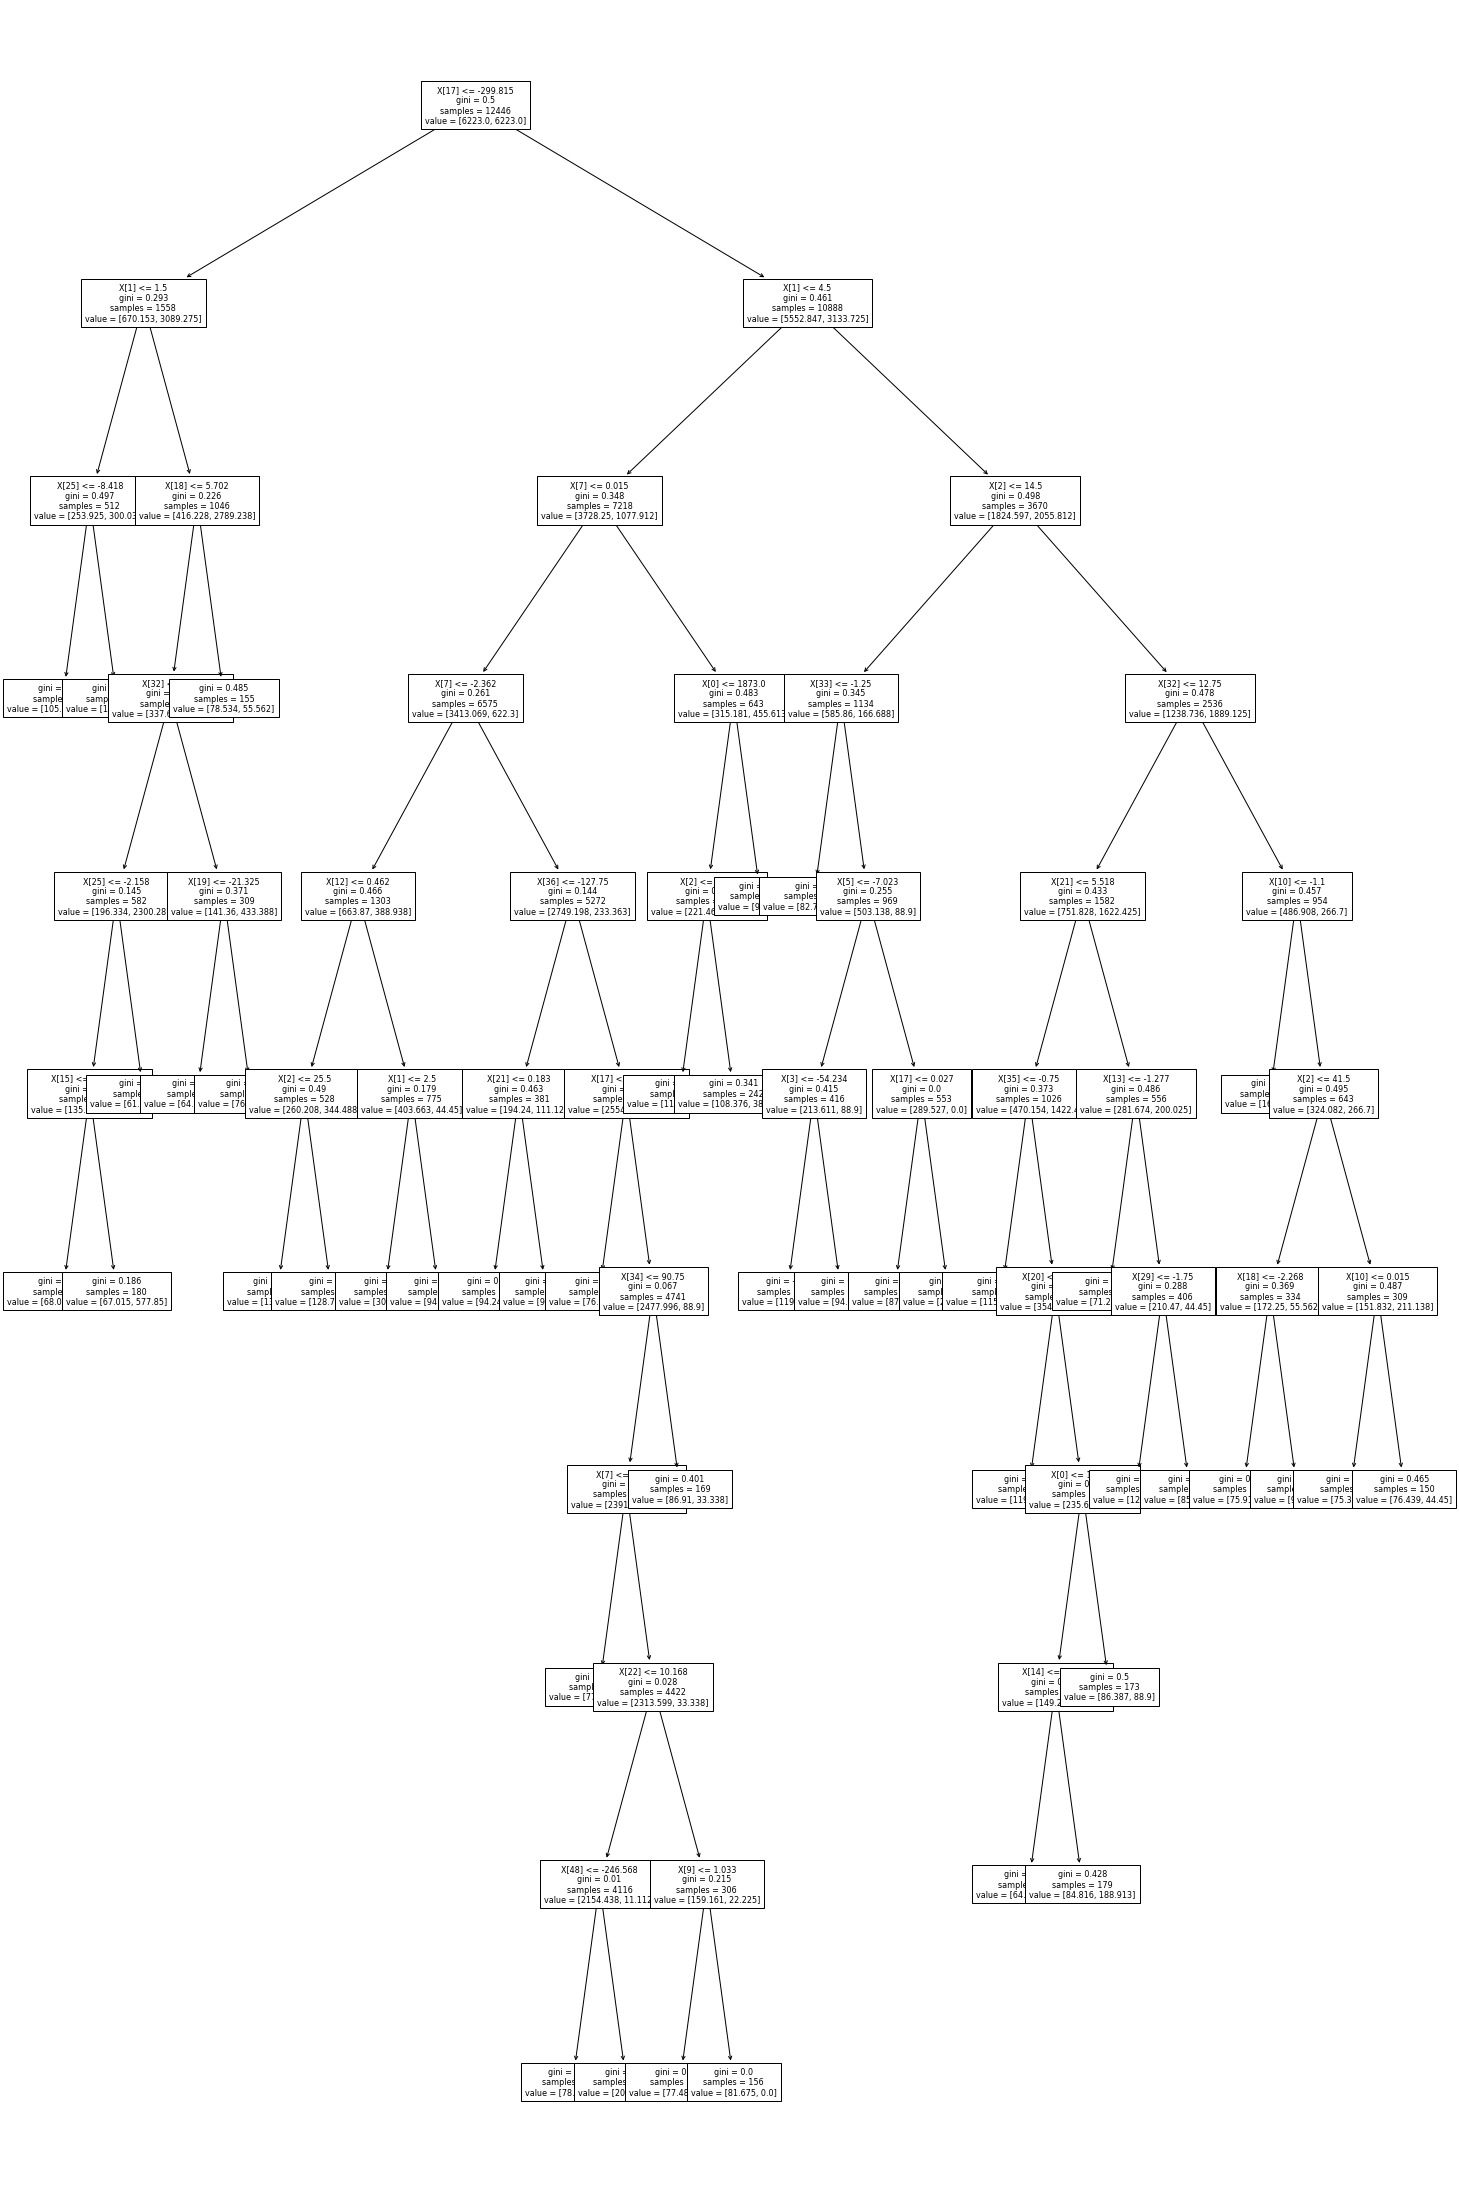

In [148]:
plt.figure(figsize=(25,40))
plot_tree(model_dt,fontsize=8)
plt.show()

In [149]:
# Top 10 important variables by decision tree
imp_features.sort_values("imp",ascending=False).head(10)

,Variables,imp
17,total_og_mou_diff,0.334067
1,no_of_days_from_last_rech,0.154372
7,roam_og_mou_diff,0.114477
2,no_of_days_from_last_rech_data,0.089810
32,last_day_rch_amt_diff,0.044429
21,loc_ic_mou_diff,0.037313
12,loc_og_mou_diff,0.033678
0,aon,0.027487
18,loc_ic_t2t_mou_diff,0.023056
10,loc_og_t2f_mou_diff,0.020283


## 5.) Conclusion:
### The main indicators to identify customers at high risk for churn are:
1. `total_og_mou_diff`:If the total outgoing calls_Minutes of usage is decreasing, then there is chance of churning, customers need to be identified and provide special package offers to retain them. 
2. `no_of_days_from_last_rech`: If the last recharge date is high, then the probability of churn is high. Intimating to customers through mails or messages can be done.
3. `roam_og_mou_diff`: Indicates that customers with roaming outgoing voice calls decreases, churn rate increases. Company need to decrease the roaming costs based on the outgoing calls usage of customers.
4. `no_of_days_from_last_rech_data`: If the last recharge date for data is high, then the probability of churn is high. Speak to customers and provide discounts to retain them.
5. `last_day_rch_amt_diff`: last day reacharge amount is low, then they are likely to churn.

### As per above main indicators, Telecom Company need to focus on:
- Providing offers to customers, who have less outgoing voice calls based on their usage.
- Company need to focus on Last recharge dates for voice calls and data, If the last day recharge amount is low, the company can call or notify customer with new packages.